In [61]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy
import random
import scipy.constants as const

### Define functions

In [ ]:
# generate NxN grid of spin either with -1 or 1 for ising model 
def generate_grid(N):
    return np.random.choice([-1,1],(N,N))

def energy_interaction_with_neighbors(grid,i,j):
    length = len(grid[0]) # assuming quadratic grid

    random_point = grid[i,j]

    left = grid[(i-1)%length,j]
    right = grid[(i+1)%length,j]
    up = grid[i,(j-1)%length]
    down = grid[i,(j+1)%length]

    # calculate energy of the grid
    energy = random_point * (left+right+up+down)
    return energy

def M(array): #magnetization function
    return np.mean(array)

def U(array,a): #internal energy function 
    U = 0
    length = len(array[0])
    for i in range(length):
        for j in range(length):
            U -= energy_interaction_with_neighbors(array,i,j)
    U  += a*np.mean(array) # a = µ*B/Energy # -= before # + sign because we want black to portray +1, white: -1 (inverted farb code); usually -
    return U 

def heat_capacity(array,temperature,count):
    #convert array into numpy array
    array = np.array(array)
    return (np.mean(array**2)/count - (np.mean(array)**2)/count**2) / (temperature**2)

def susceptibility(array,temperature,length,count):
    #convert array into numpy array
    array = np.array(array)
    return (np.mean(array**2)/count - (np.mean(array)**2)/count**2)/(temperature*length**2)

# calculate energy of the grid
def Hamiltonian_Monte_carlo(grid,temperature, a = 0, J = 1):
    length = len(grid[0])
    i = np.random.randint(0,length)
    j = np.random.randint(0,length)
    count = 0

    d_energy = J * 2 * energy_interaction_with_neighbors(grid,i,j) - 2*a*grid[i,j] # +/- before in first/second term
    
    # flip spin according to energy
    if d_energy < 0:
        grid[i,j] = - grid[i,j]
        count += 1
    elif np.random.uniform() < np.exp(-d_energy/(temperature)): 
            grid[i,j] = - grid[i,j]
            count += 1

    # print(grid)
    return grid, count

### Iteration

In [63]:
length_grid = 50
grid_array = generate_grid(length_grid)
grid_array_B = generate_grid(length_grid)

/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/460626602.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


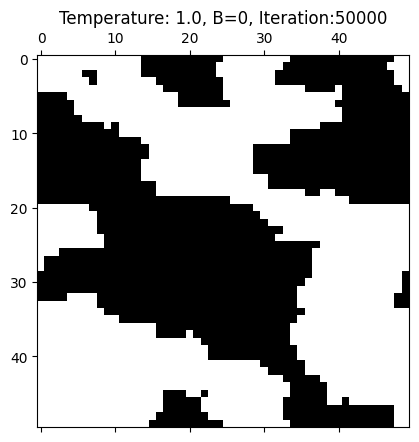

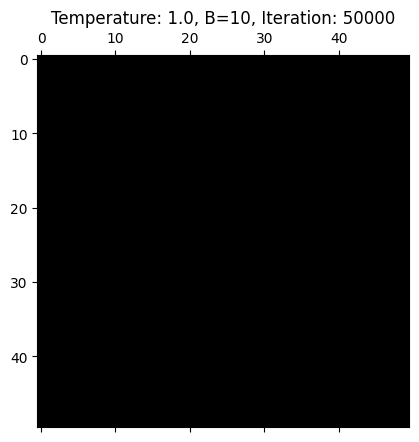

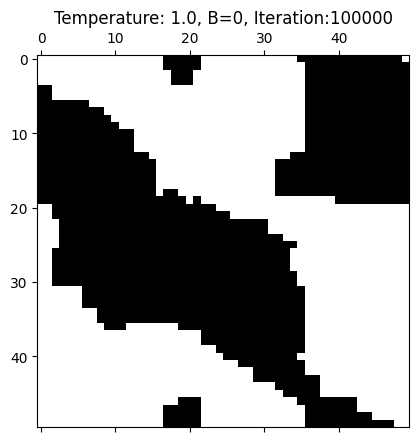

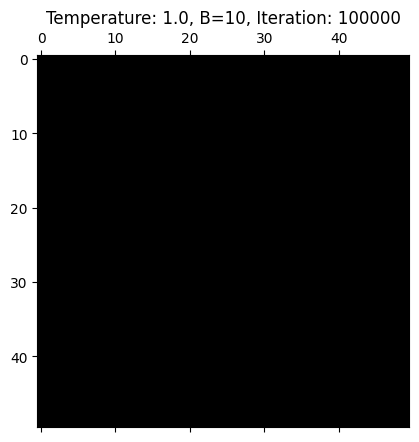

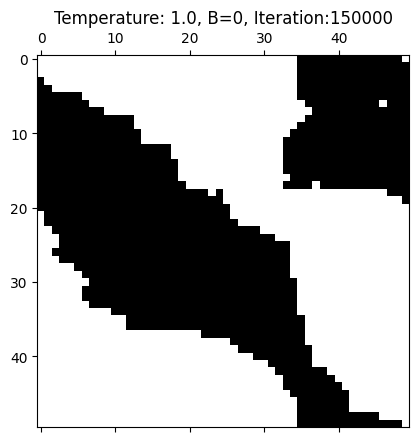

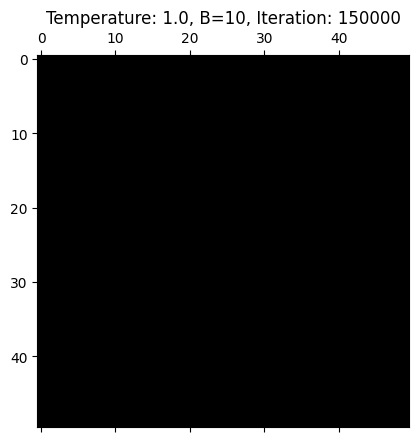

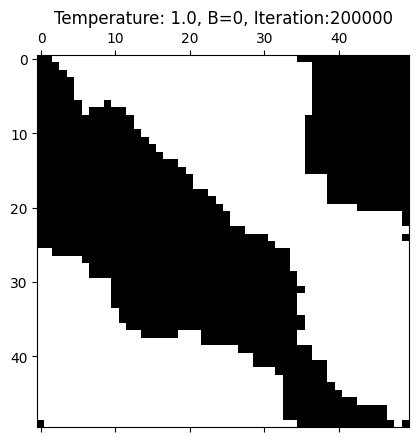

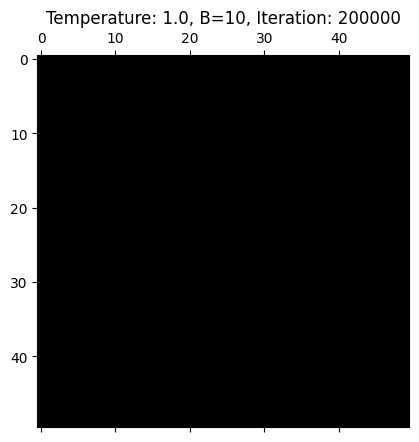

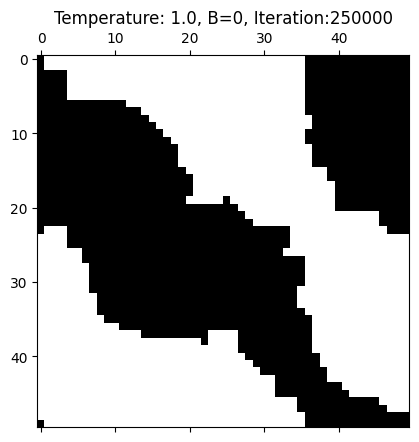

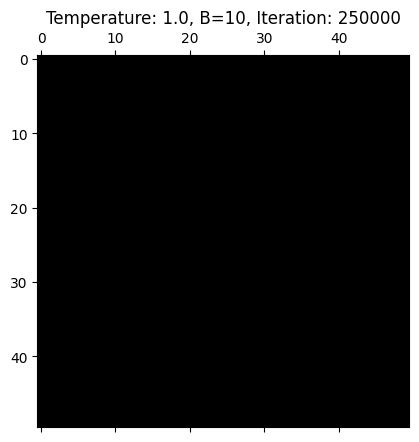

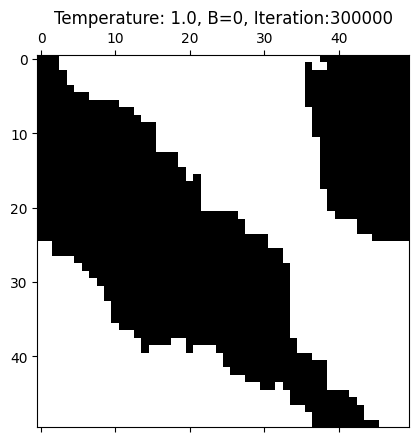

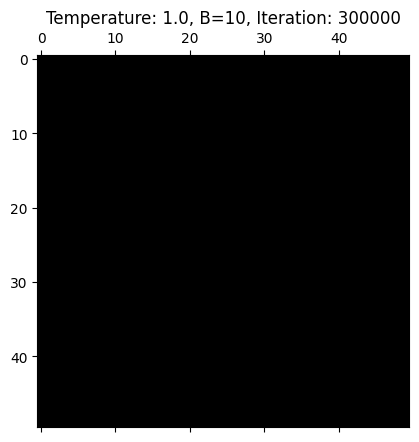

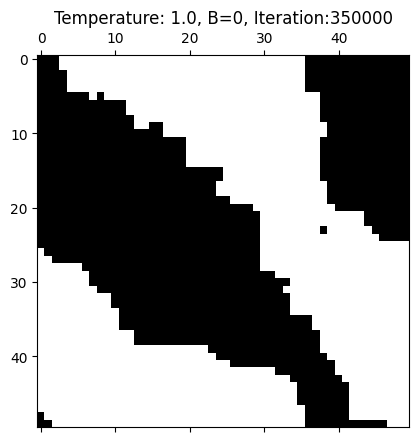

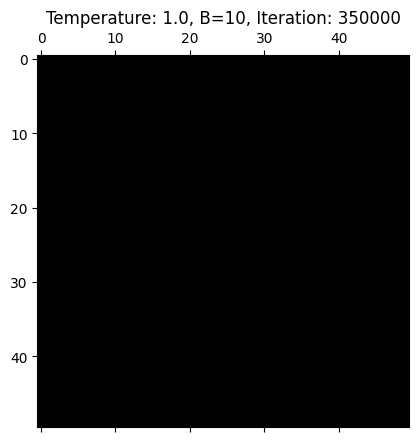

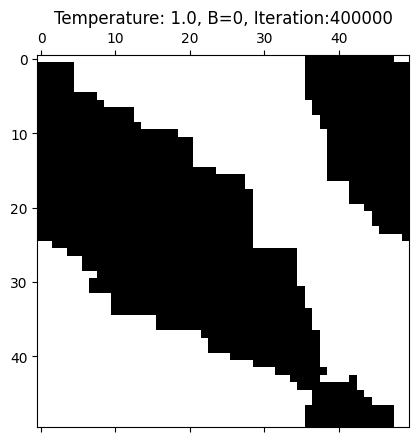

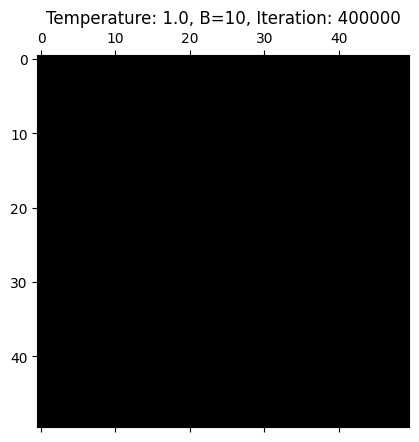

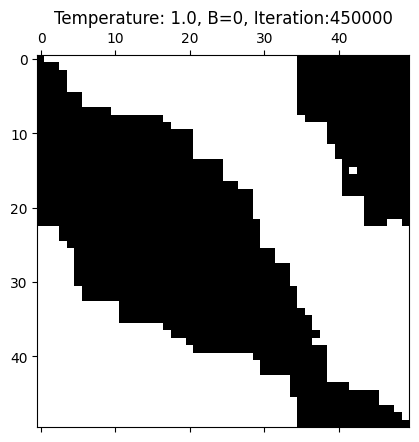

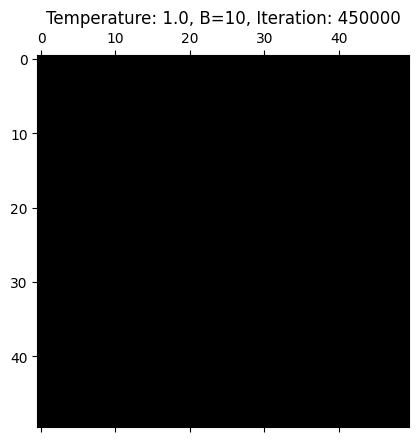

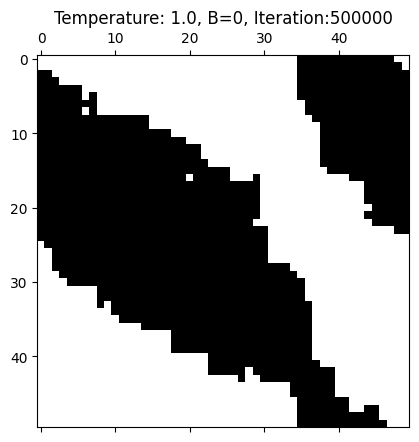

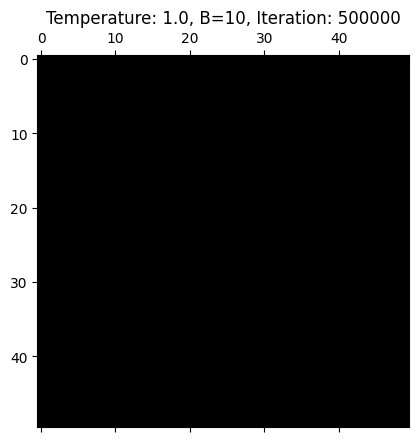

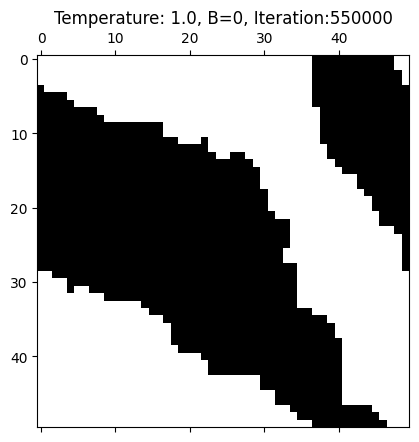

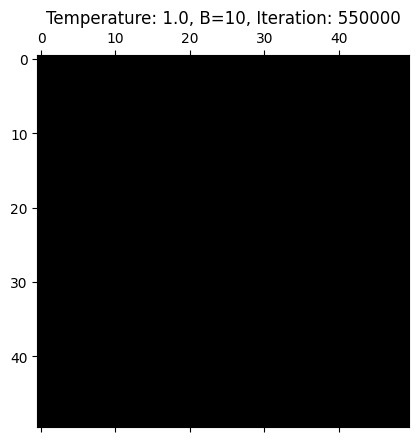

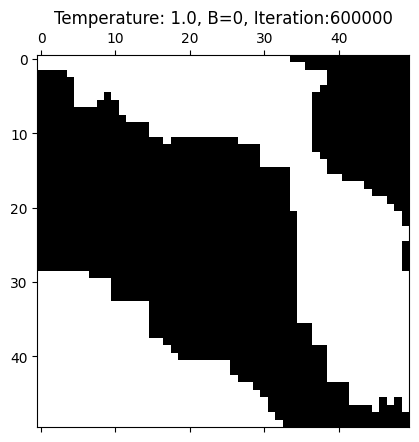

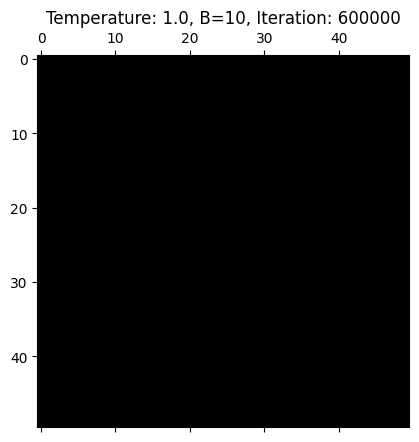

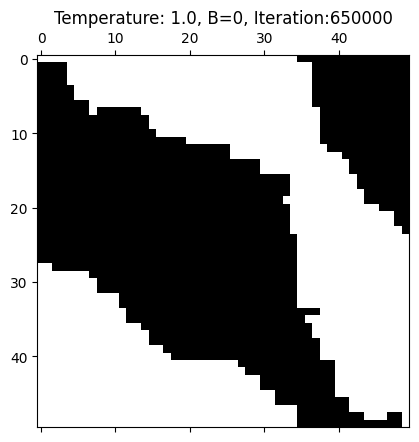

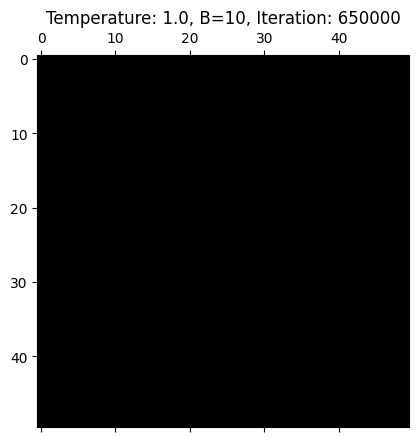

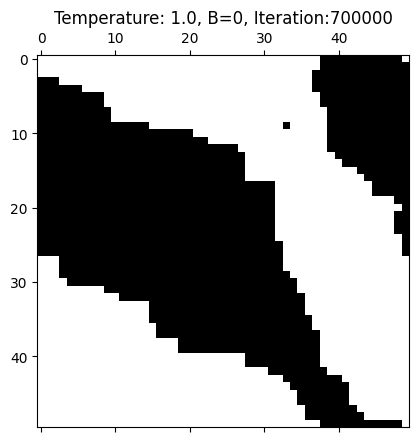

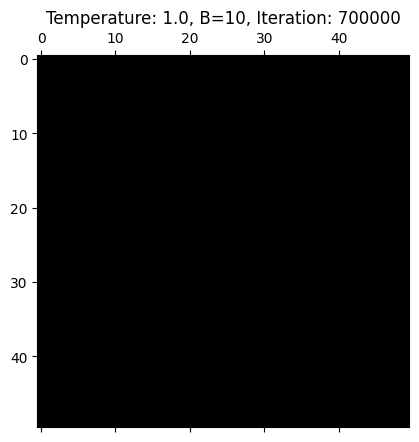

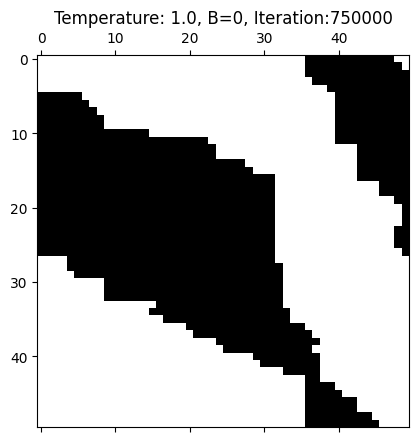

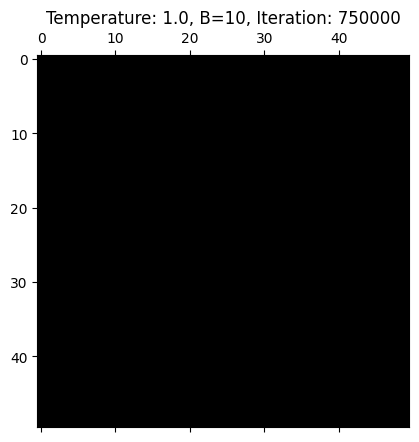

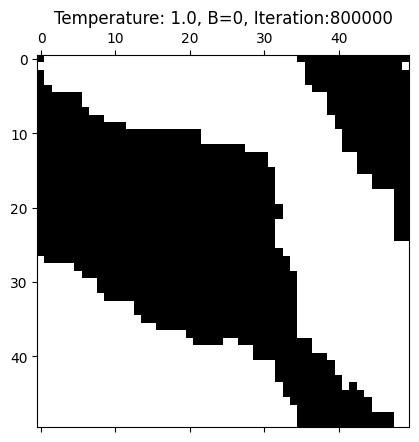

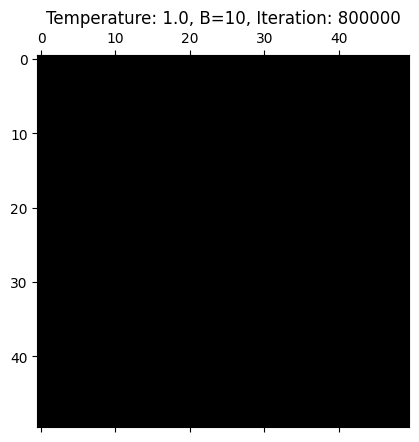

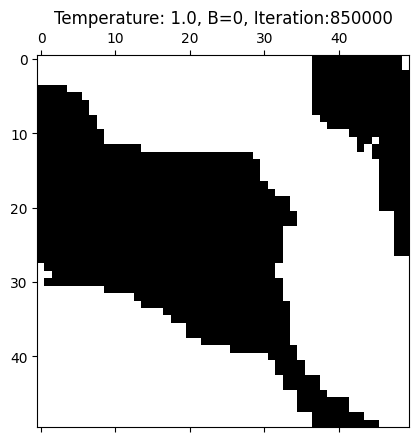

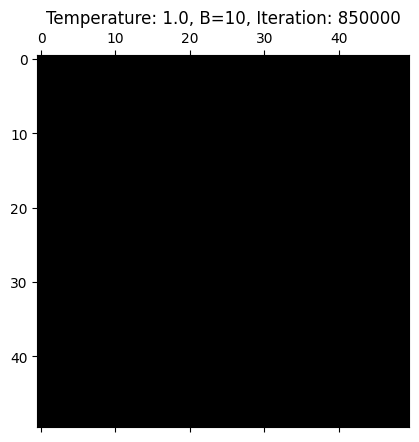

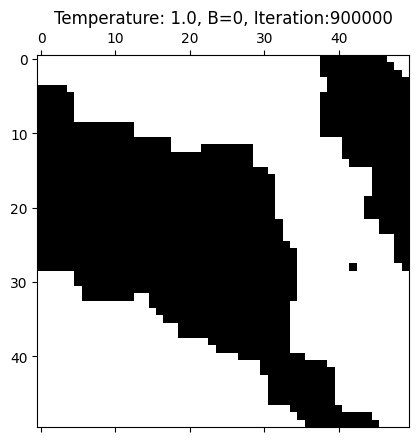

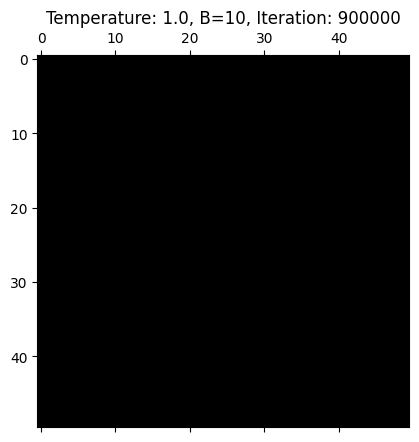

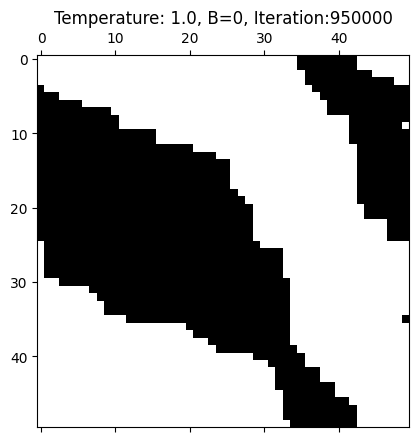

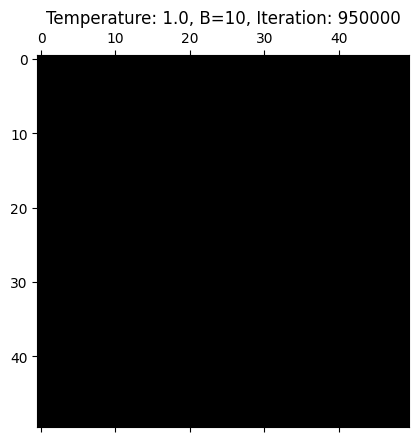

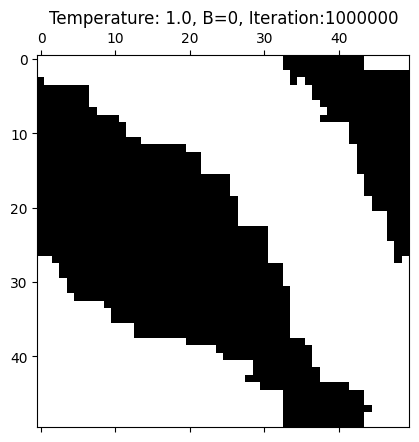

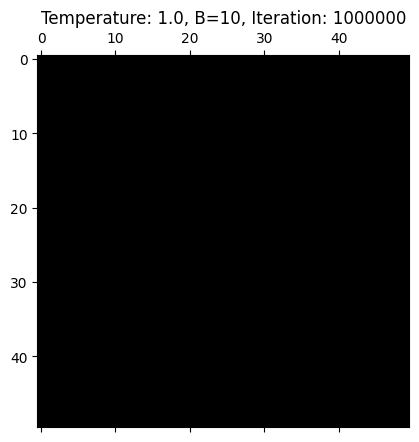

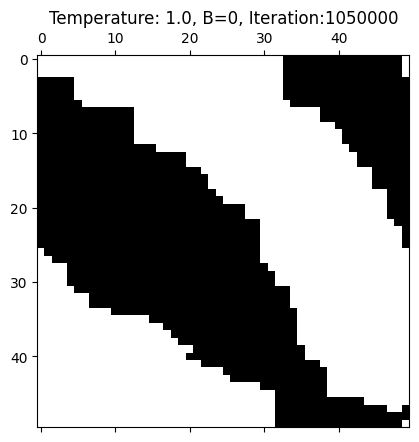

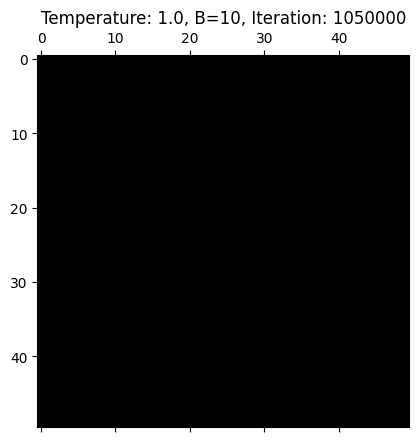

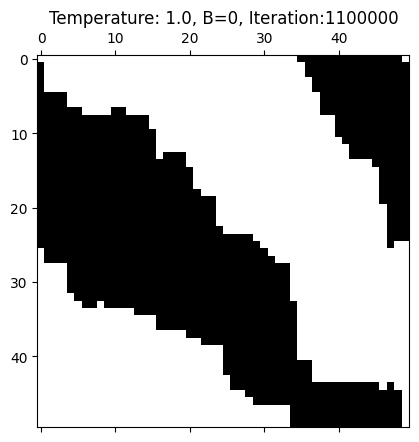

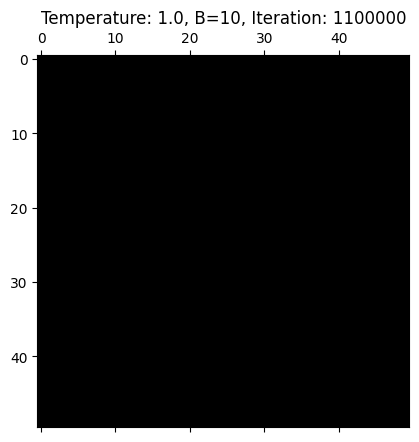

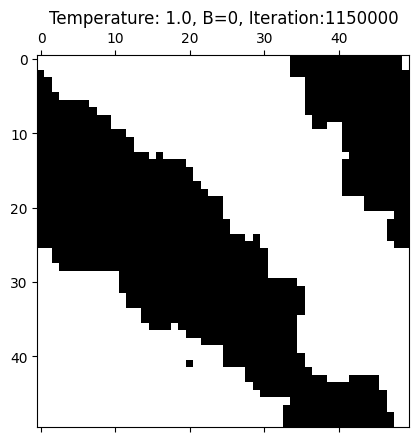

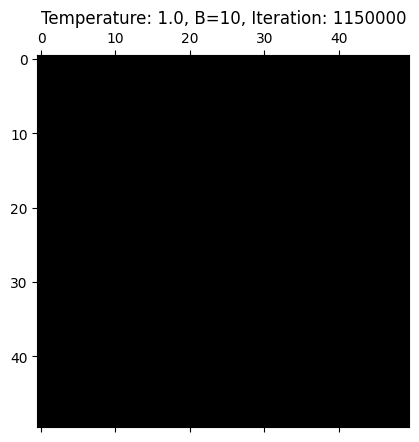

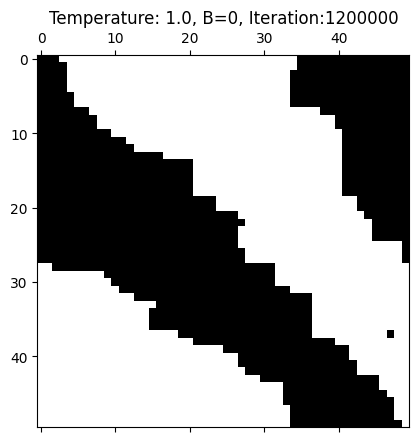

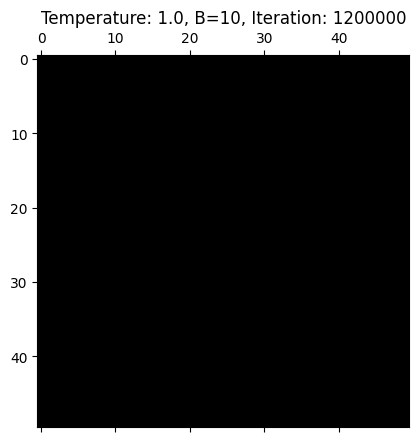

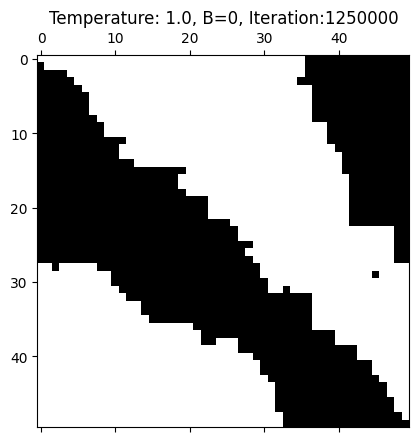

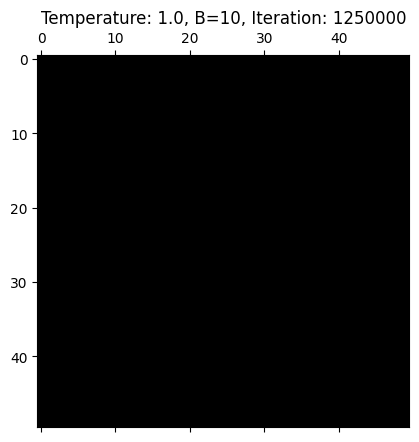

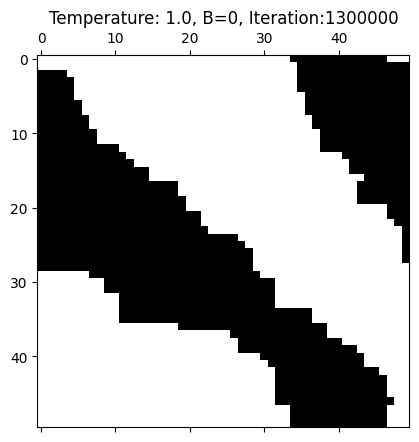

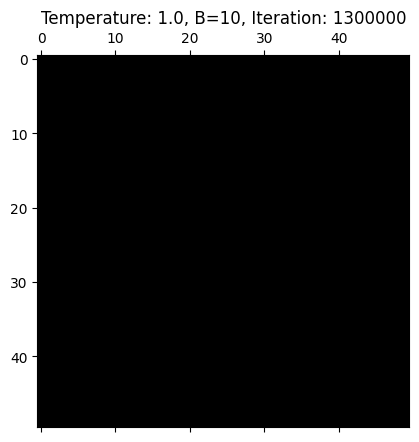

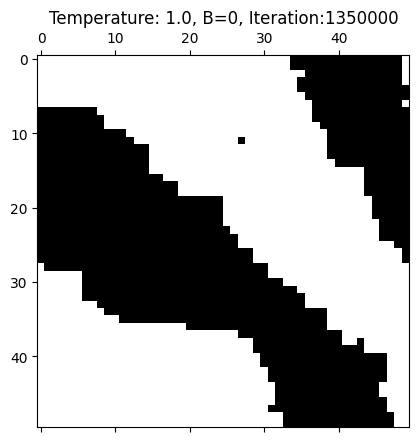

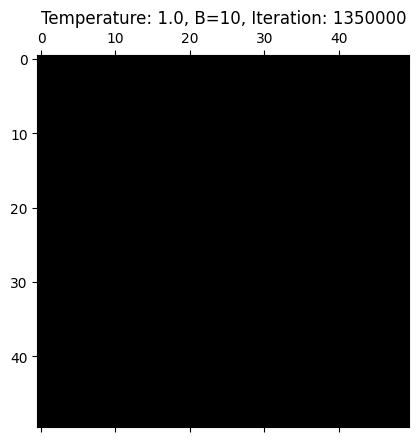

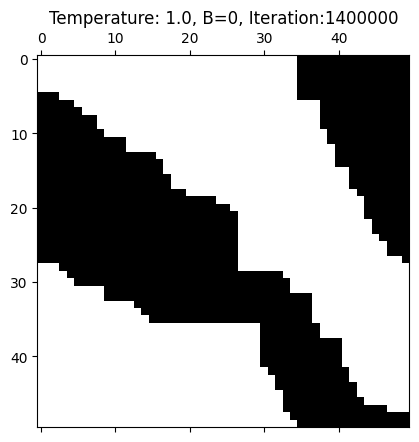

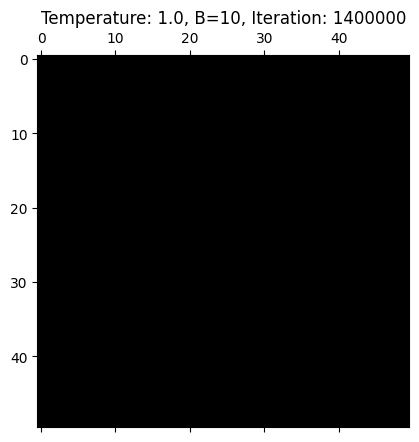

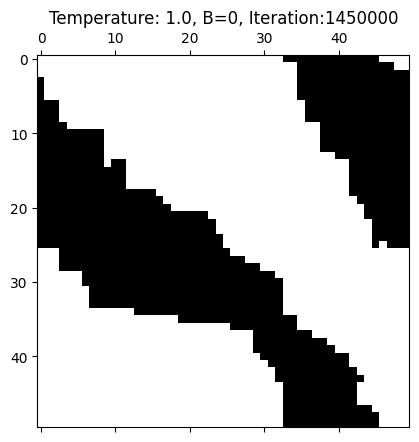

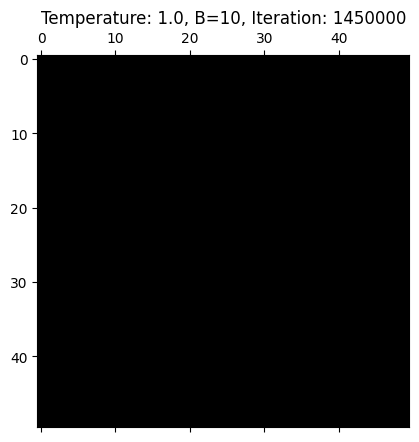

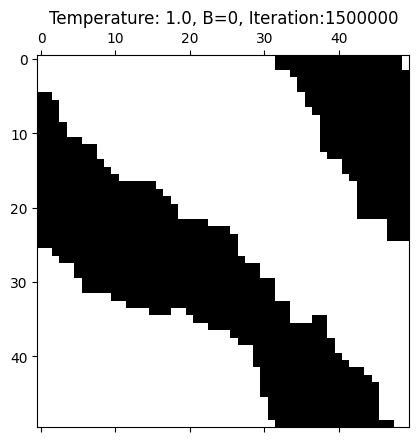

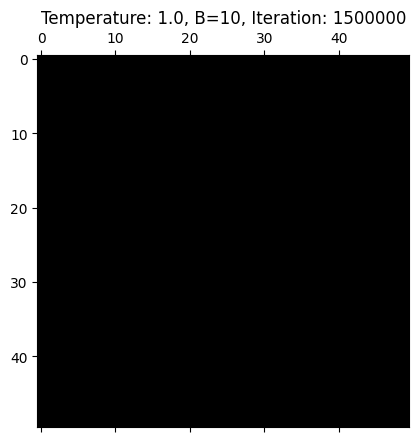

In [64]:
count_list = []
count_list_B = []
count_adding_up = 0
count_adding_up_B = 0

mag_list = []
internal_energy_list = []
susceptibility_list=[]
heat_capacity_list = []
mag_list_B = []
internal_energy_list_B = []
susceptibility_list_B=[]
heat_capacity_list_B = [] 

iteration_times = 30
iteration_length = 50000 # 10000 /before: 50000, 15*500000 war Grenze (equilibration at)

temp = 1.0
for i in range(iteration_times):
    for j in range(iteration_length):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,a=0,temperature = temp)
        count_adding_up += count
    plt.matshow(grid_array,cmap='gray')
    plt.title('Temperature: '+str(temp)+', B=0, Iteration:'+str((i+1)*(j+1)))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(i+1)+'.png')
    #print(count_adding_up)
    count_list.append(count_adding_up)
    mag_list.append(M(grid_array))
    internal_energy_list.append(U(grid_array,0))
    heat_capacity_list.append(heat_capacity(internal_energy_list,temp,count_adding_up))
    susceptibility_list.append(susceptibility(mag_list,temp,length_grid,count_adding_up))
    for j in range(iteration_length):
        grid_array_B,count_B = Hamiltonian_Monte_carlo(grid = grid_array_B,a=10,temperature = temp)
        count_adding_up_B += count_B
    plt.matshow(grid_array_B,cmap='gray')
    plt.title('Temperature: '+str(temp)+', B=10, Iteration: '+str((i+1)*(j+1)))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(i+1)+'B.png')
    #print(count_adding_up)
    count_list_B.append(count_adding_up_B)
    mag_list_B.append(M(grid_array_B))
    internal_energy_list_B.append(U(grid_array_B,0))
    heat_capacity_list_B.append(heat_capacity(internal_energy_list_B,temp,count_adding_up_B))
    susceptibility_list_B.append(susceptibility(mag_list_B,temp,length_grid,count_adding_up_B))

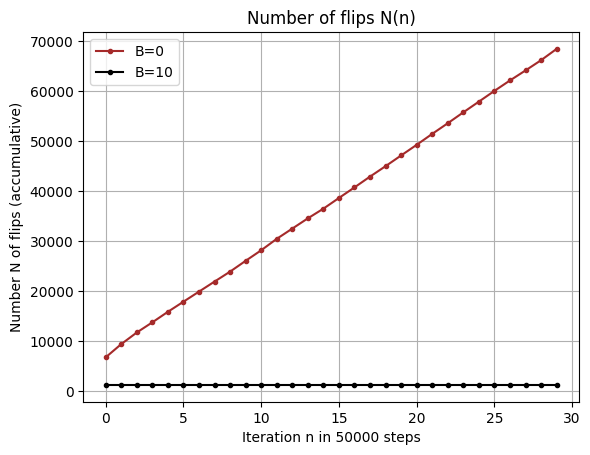

In [65]:
plt.plot(np.arange(iteration_times),count_list, "-",marker='.',color='brown',label='B=0')
plt.plot(np.arange(iteration_times),count_list_B, "-",marker='.',color='black',label='B=10')
plt.xlabel(f'Iteration n in {iteration_length} steps')
plt.ylabel('Number N of flips (accumulative)')
plt.title('Number of flips N(n)')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Spin flip (n)',format='png')

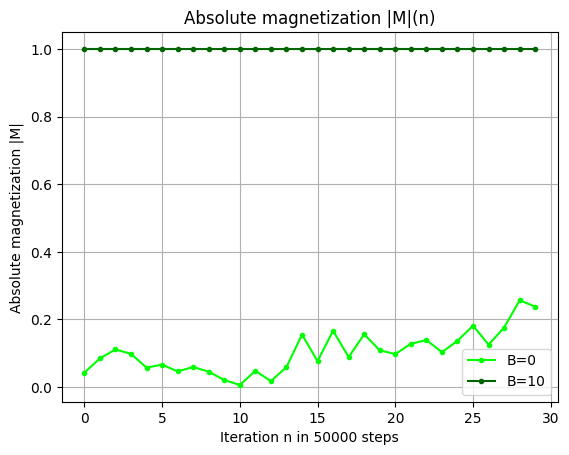

In [66]:
plt.plot(np.arange(iteration_times),np.absolute(mag_list), "-",marker='.', color='lime',label='B=0')
plt.plot(np.arange(iteration_times),np.absolute(mag_list_B), "-",marker='.', color='darkgreen',label='B=10')
plt.xlabel(f'Iteration n in {iteration_length} steps')
plt.ylabel('Absolute magnetization |M|')
plt.title('Absolute magnetization |M|(n)')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Magnetization (n).png')

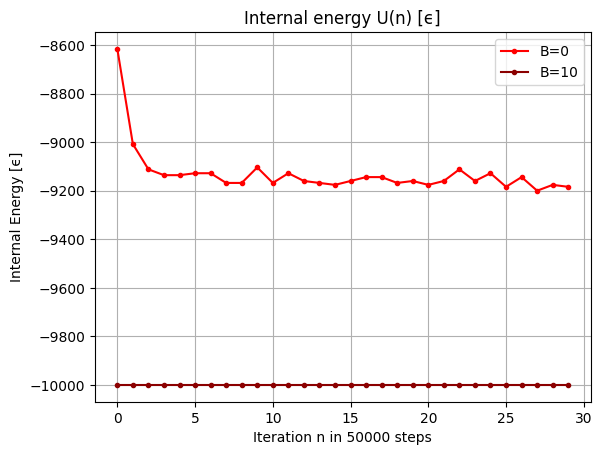

In [67]:
plt.plot(np.arange(iteration_times),internal_energy_list, "-",marker='.',color='red',label='B=0')
plt.plot(np.arange(iteration_times),internal_energy_list_B, "-",marker='.',color='darkred',label='B=10')
plt.xlabel(f'Iteration n in {iteration_length} steps')
plt.ylabel('Internal Energy [ϵ]')
plt.title('Internal energy U(n) [ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Internal energy (n).png')

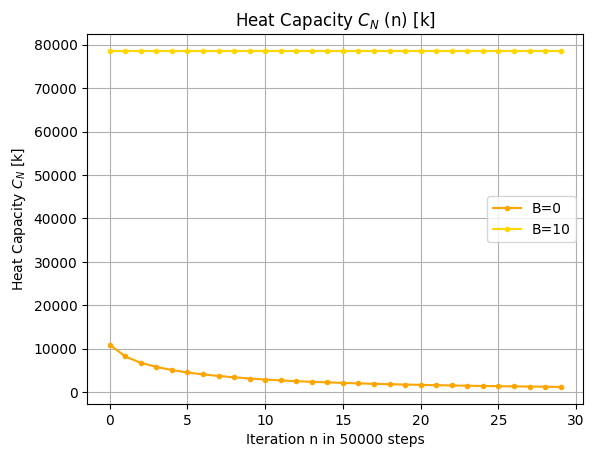

In [68]:
plt.plot(np.arange(iteration_times),heat_capacity_list, "-", marker='.',color='orange',label='B=0')
plt.plot(np.arange(iteration_times),heat_capacity_list_B, "-", marker='.',color='gold',label='B=10')
plt.xlabel(f'Iteration n in {iteration_length} steps')
plt.ylabel('Heat Capacity $C_N$ [k]')
plt.title('Heat Capacity $C_N$ (n) [k]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Heat capacity (n).png')

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/1010146932.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/1010146932.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Susceptibility $\chi$ (n) [1/ϵ]')


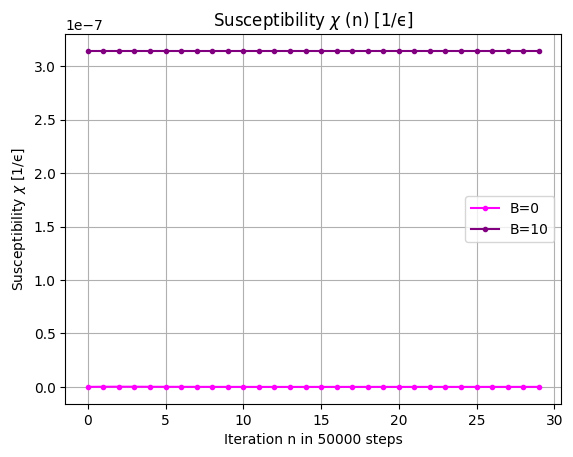

In [69]:
plt.plot(np.arange(iteration_times),susceptibility_list, "-", marker='.',color='magenta',label='B=0')
plt.plot(np.arange(iteration_times),susceptibility_list_B, "-", marker='.',color='purple',label='B=10')
plt.xlabel(f'Iteration n in {iteration_length} steps')
plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
plt.title('Susceptibility $\chi$ (n) [1/ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Susceptibility (n).png')

### Save as gif

In [70]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

# B=0
image_array = []

for i in range(iteration_times):
    image_array.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(i+1)+'.png'))

# B=10
image_array_B = []

for i in range(iteration_times):
    image_array_B.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(i+1)+'B.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


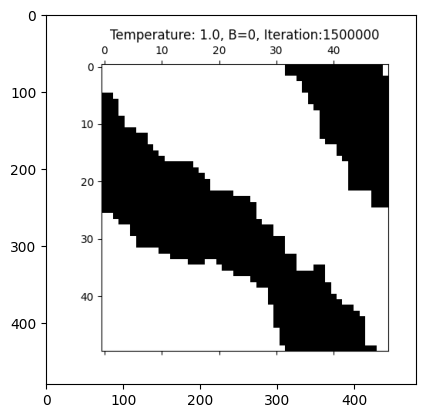

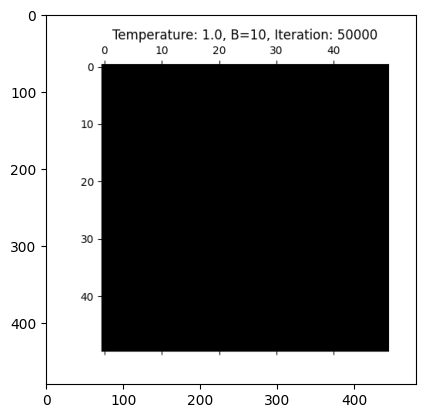

In [71]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF n (B=0).gif')

fig,ax = plt.subplots()
im = ax.imshow(image_array_B[0])

def update(i):
    im.set_array(image_array_B[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array_B),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF n (B=10).gif')

### Make measurements at different temperatures, each after 10000 steps

/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/2094335304.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


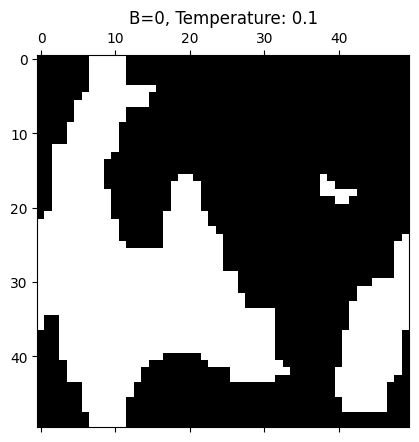

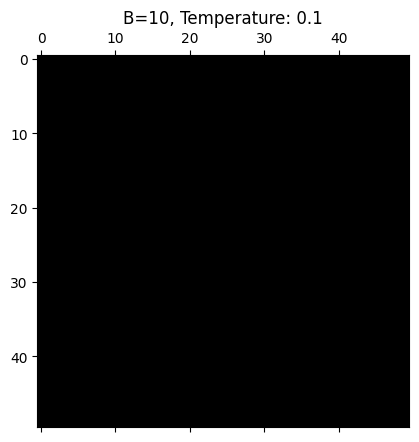

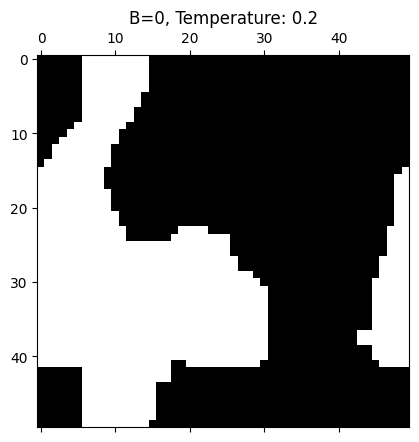

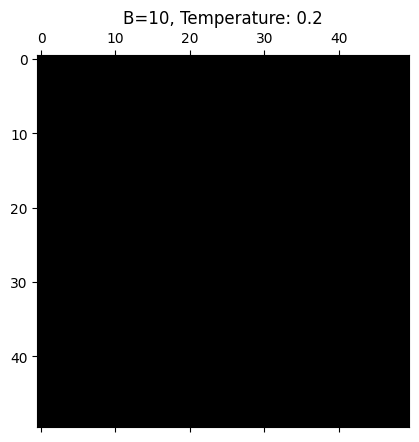

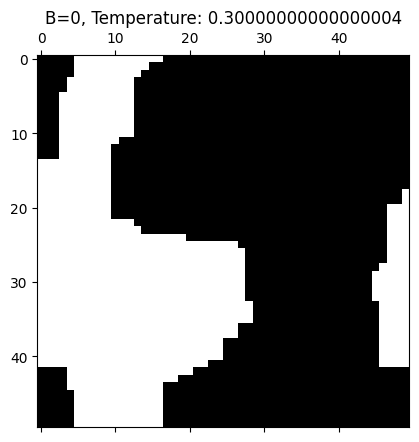

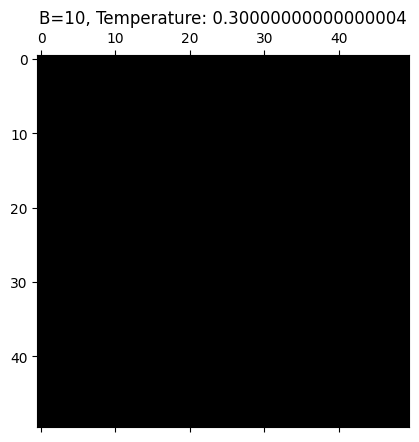

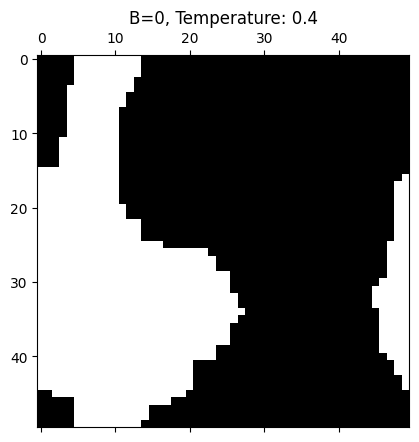

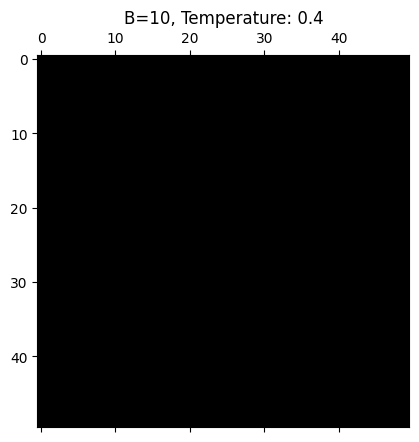

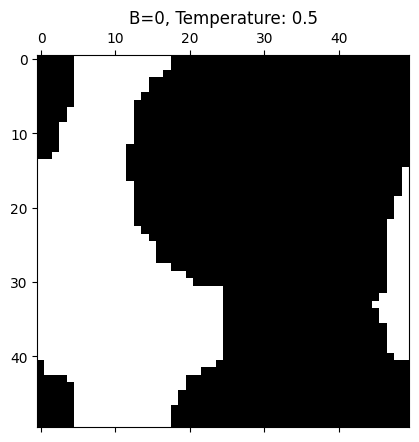

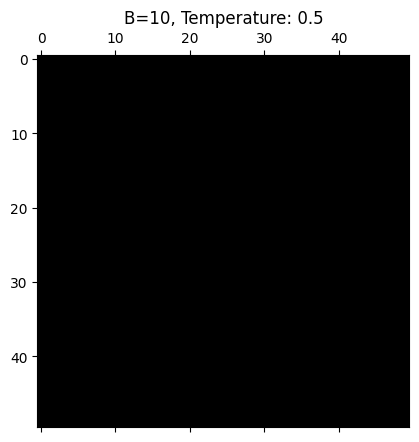

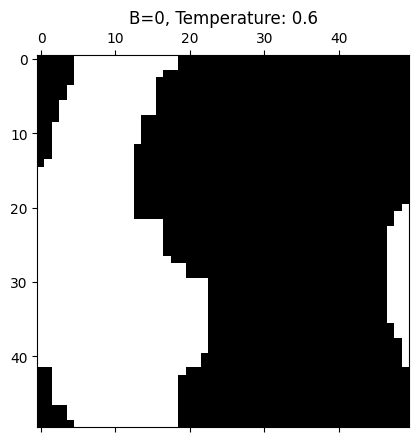

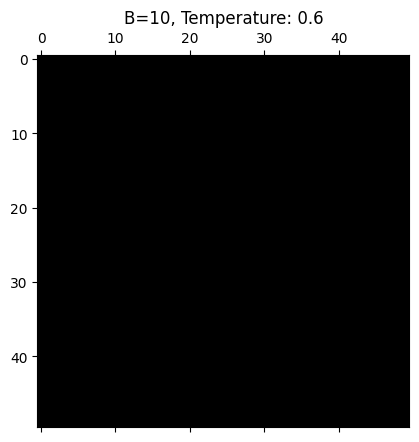

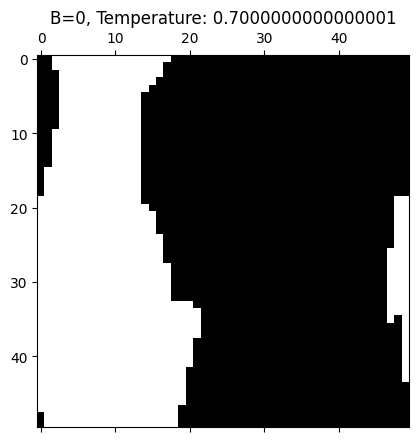

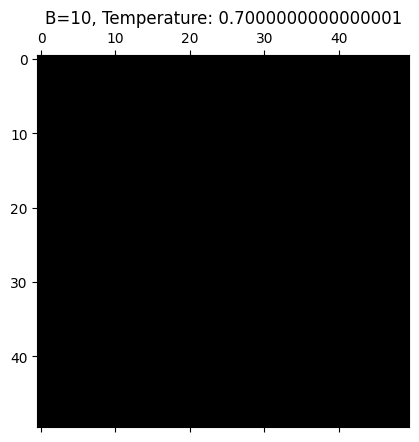

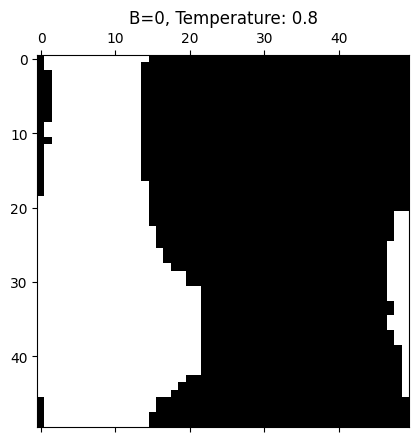

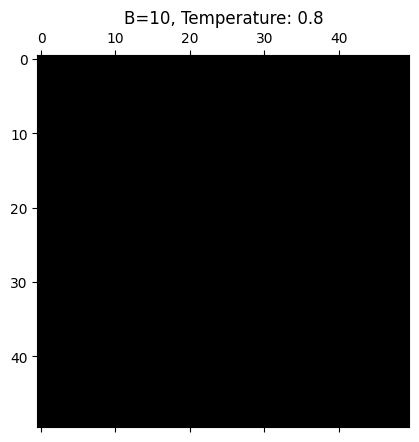

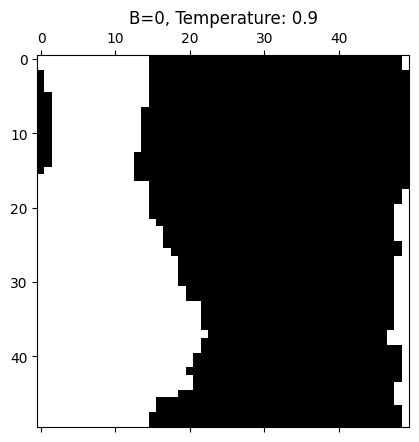

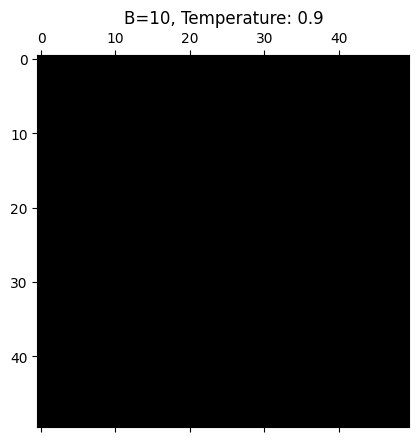

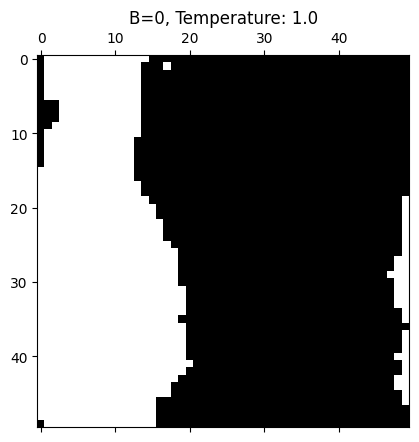

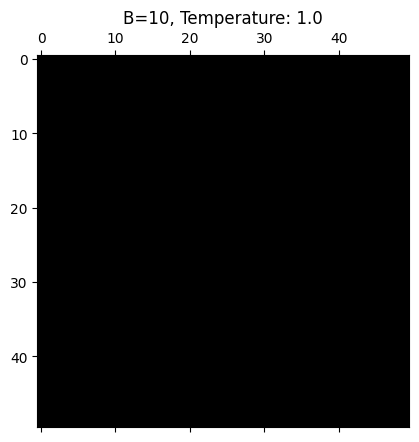

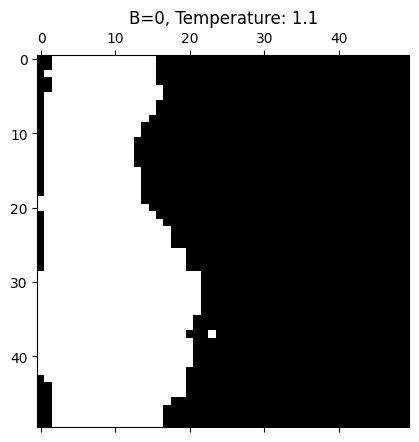

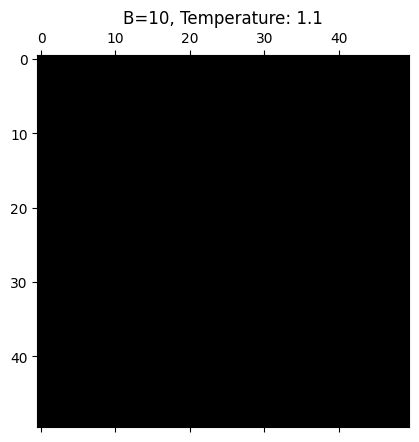

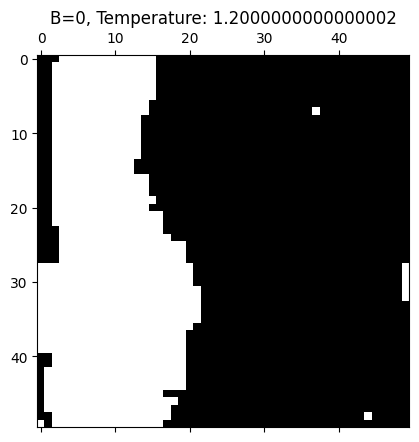

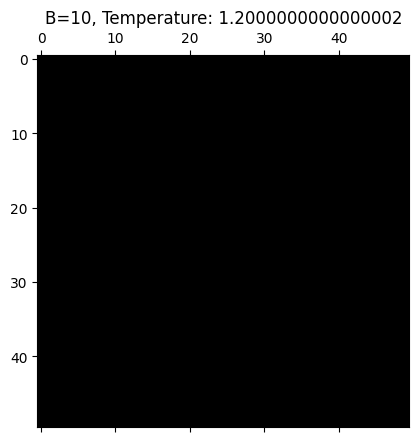

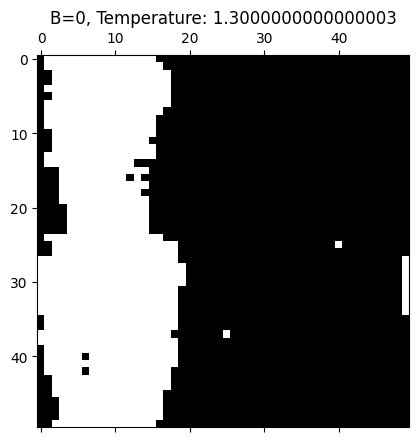

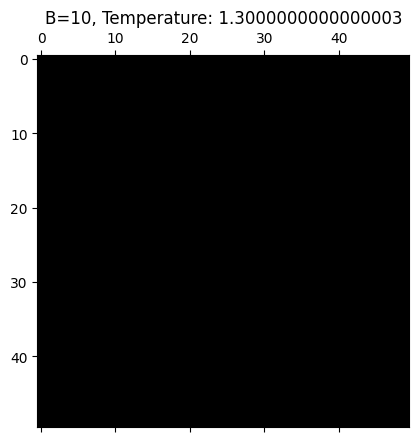

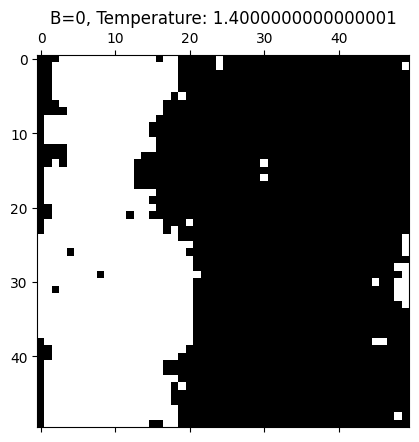

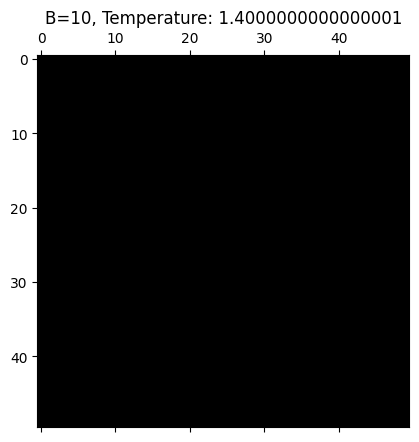

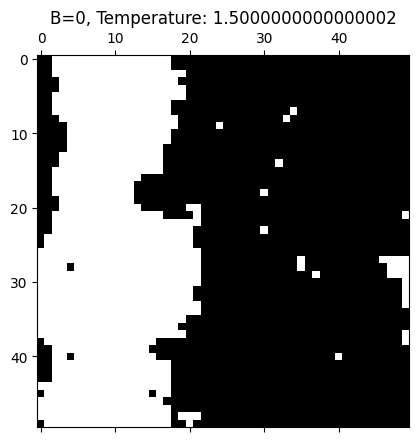

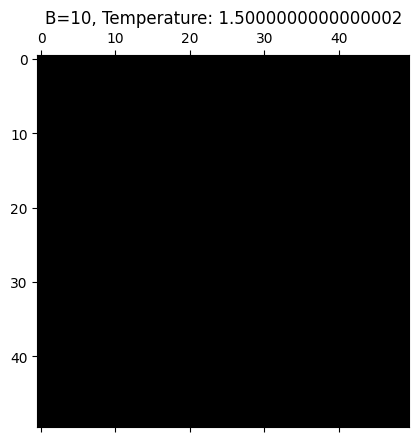

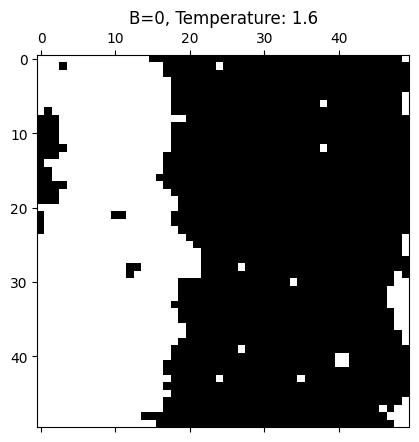

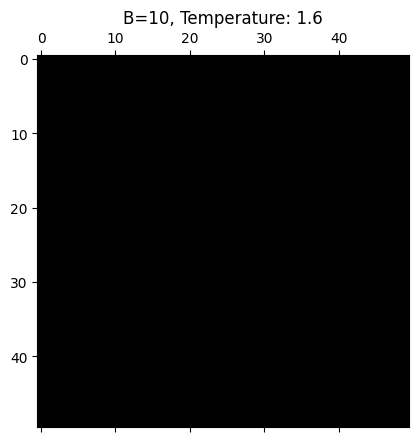

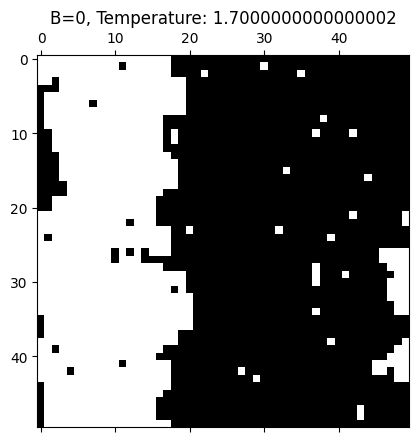

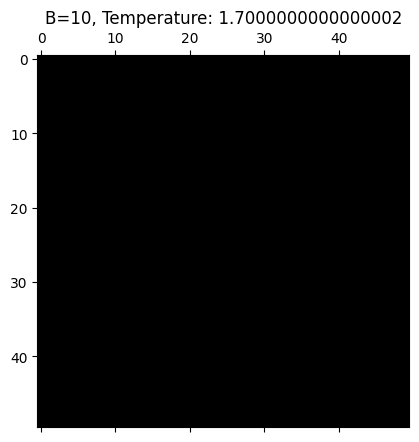

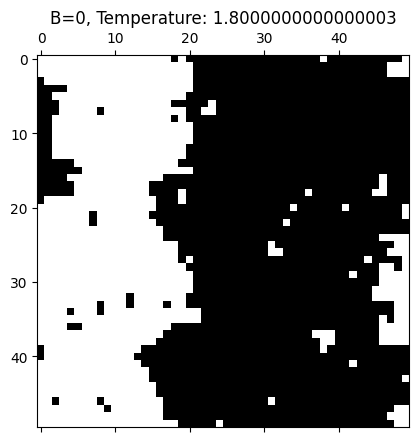

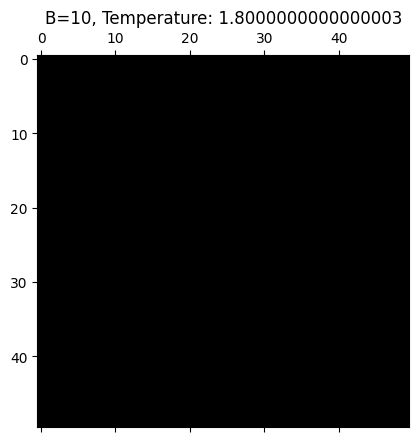

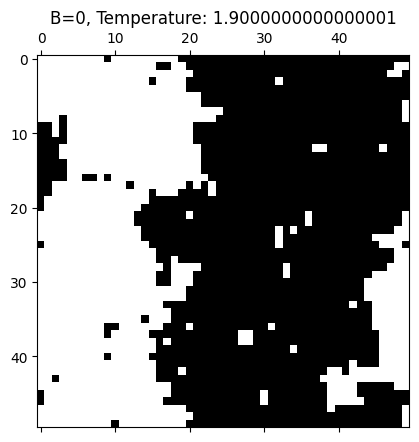

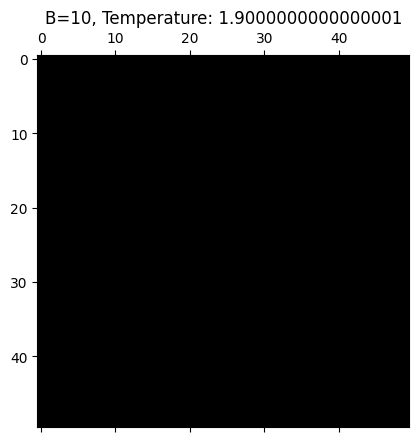

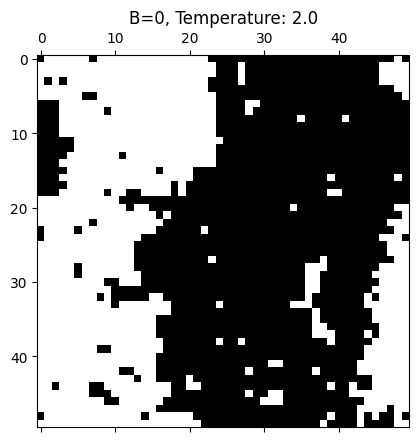

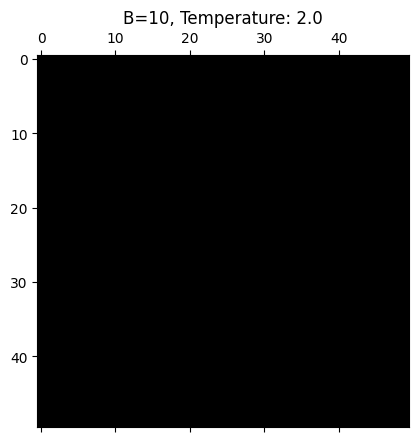

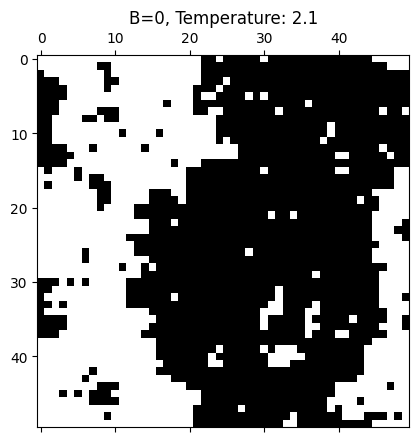

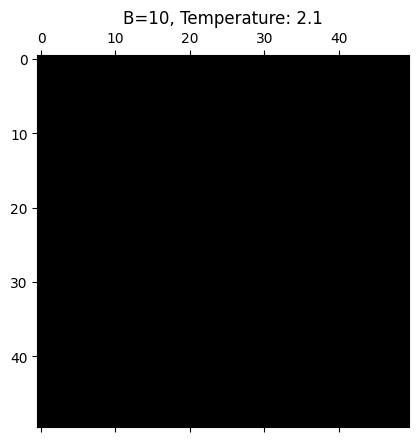

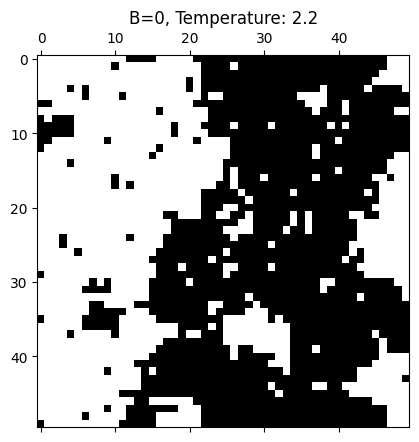

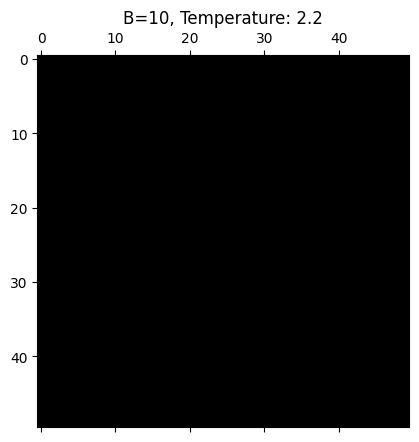

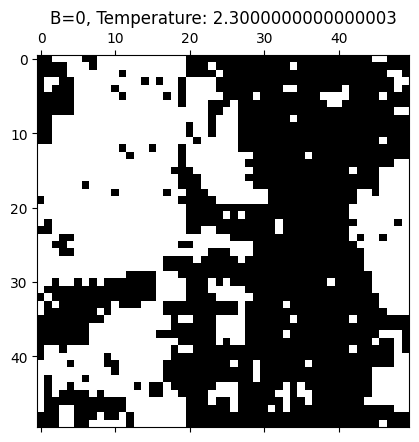

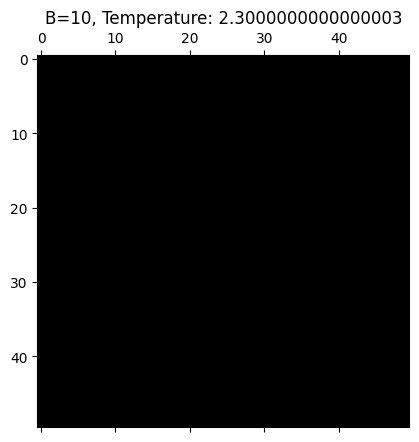

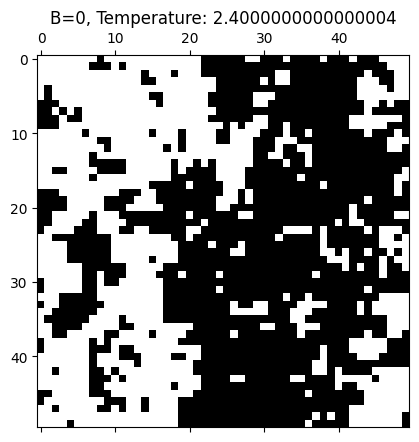

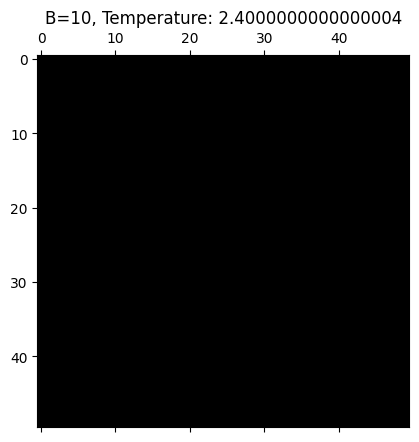

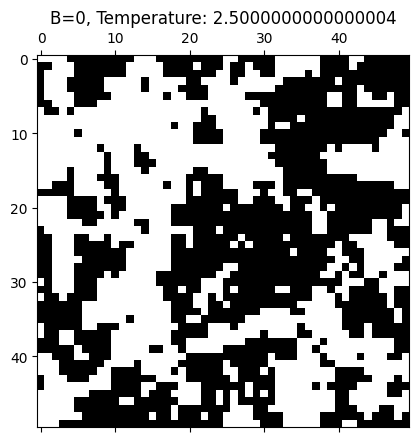

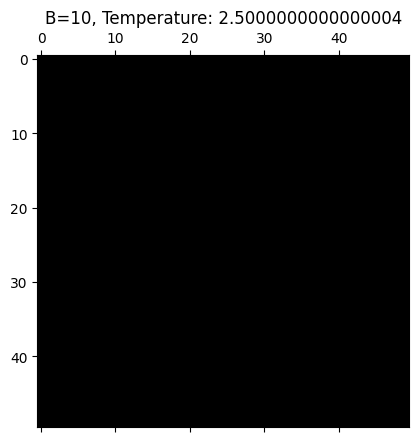

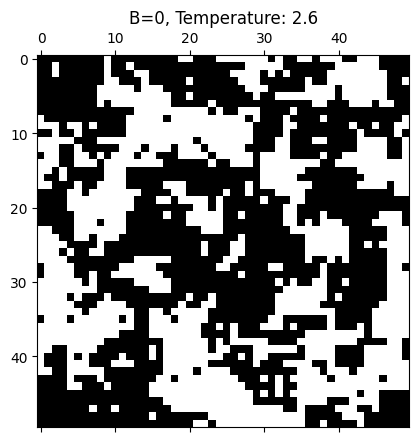

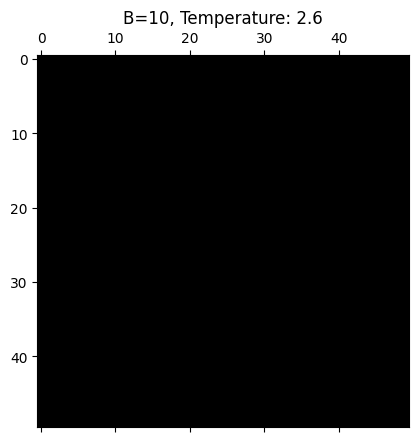

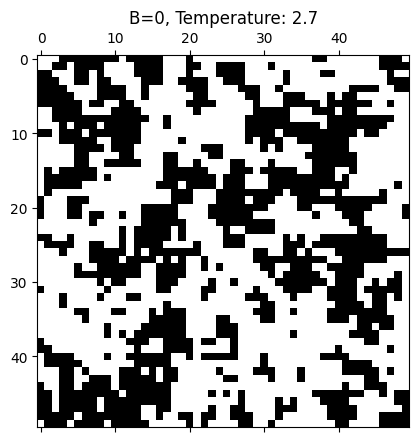

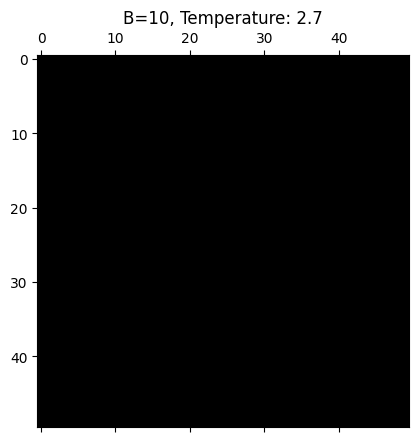

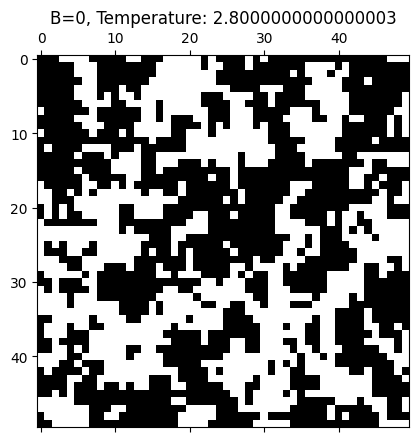

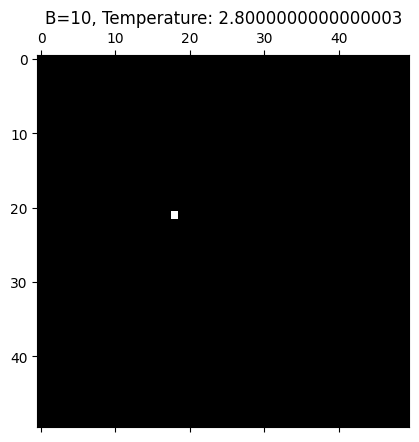

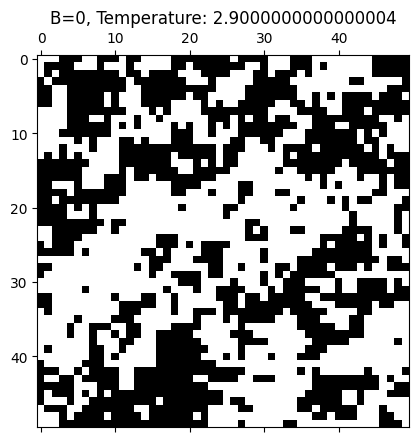

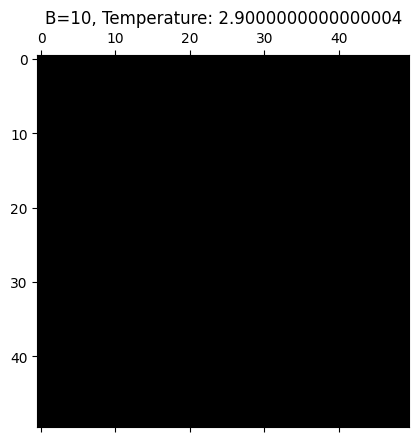

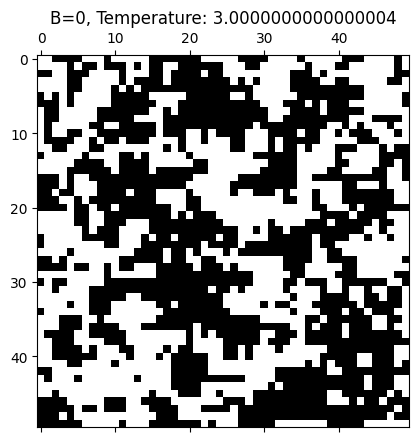

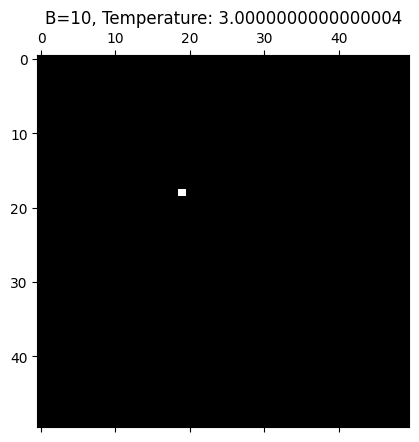

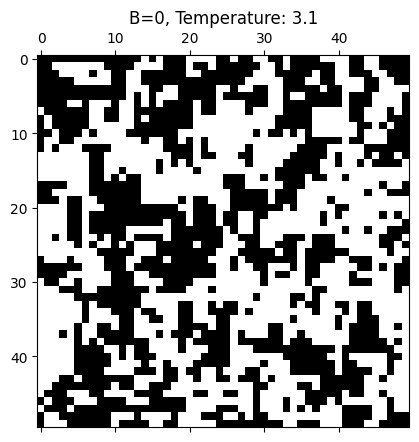

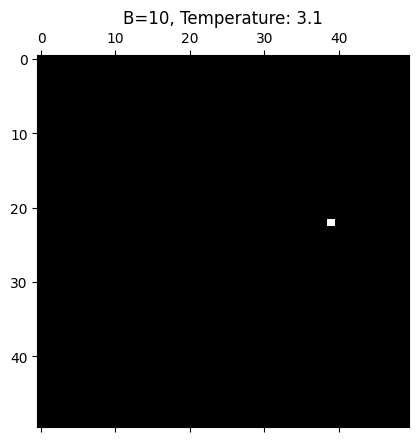

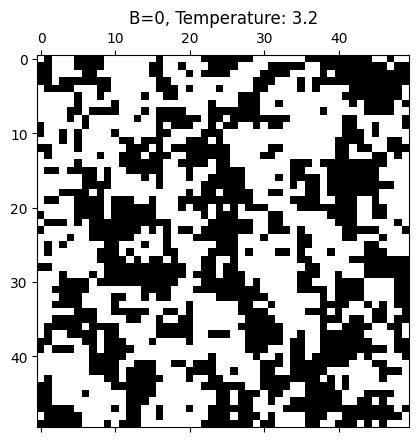

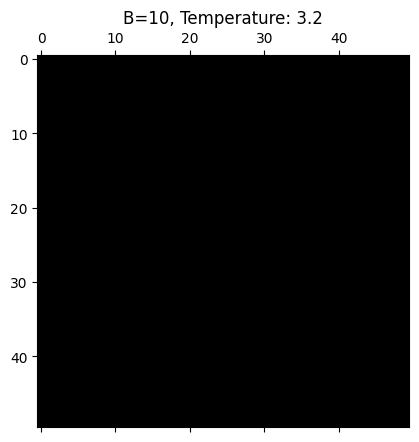

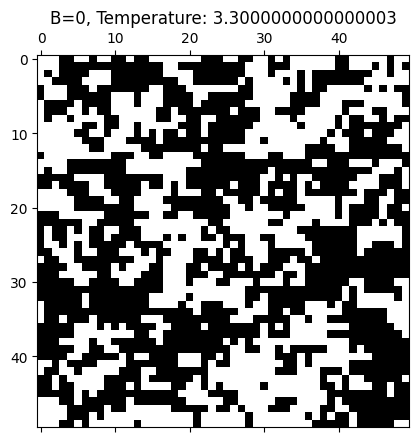

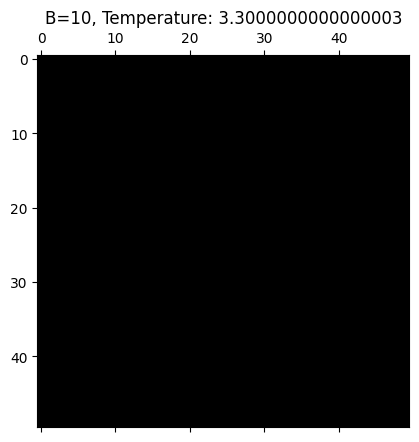

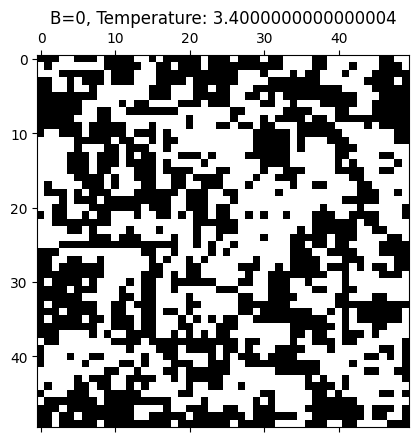

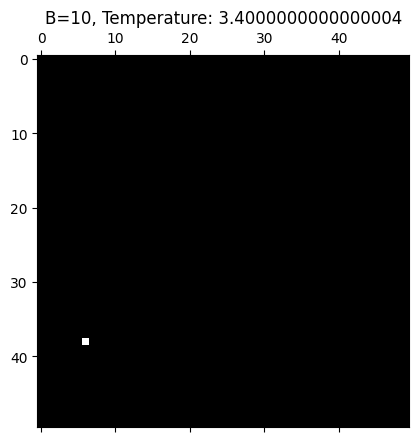

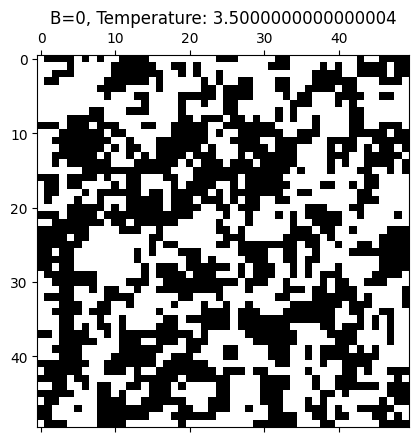

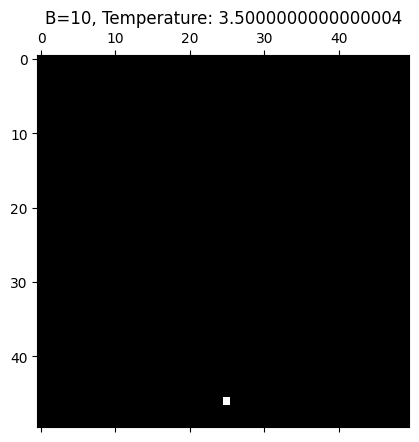

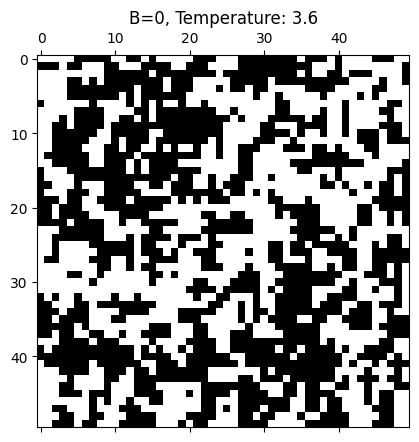

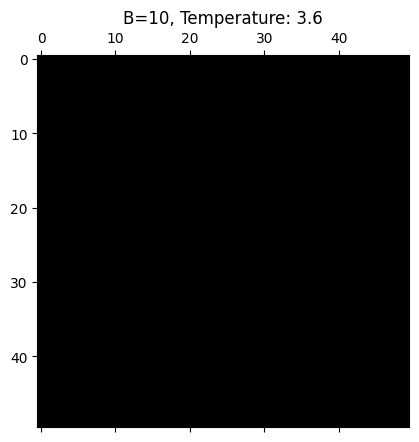

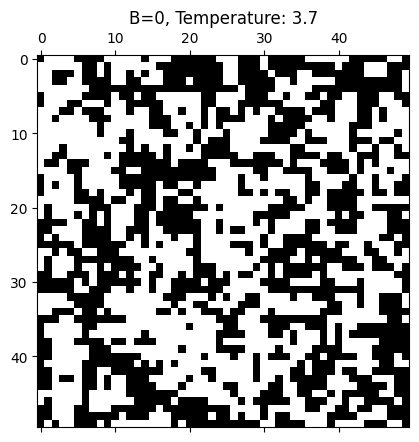

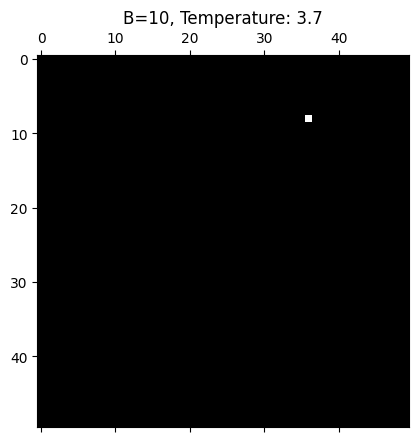

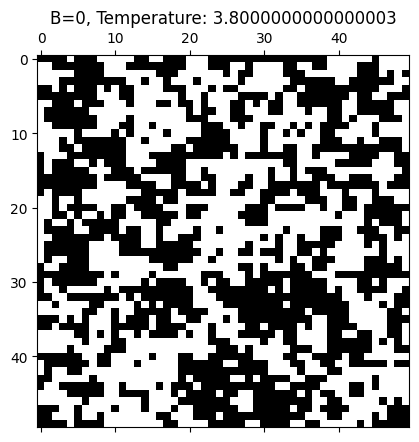

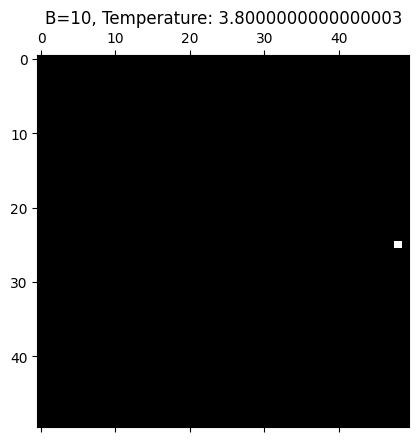

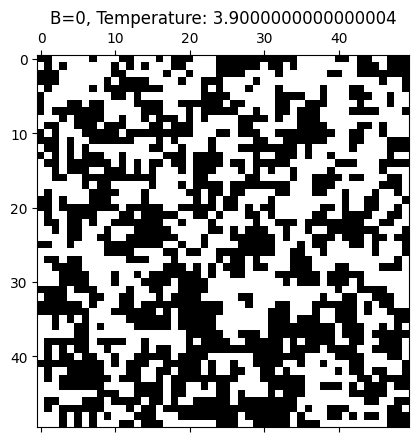

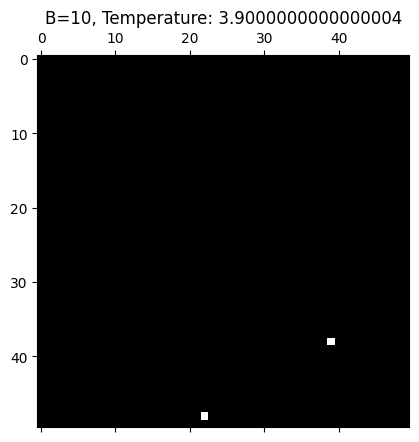

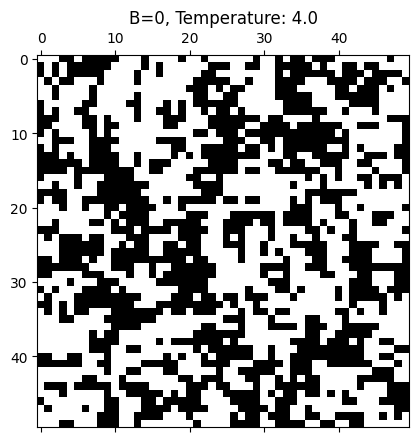

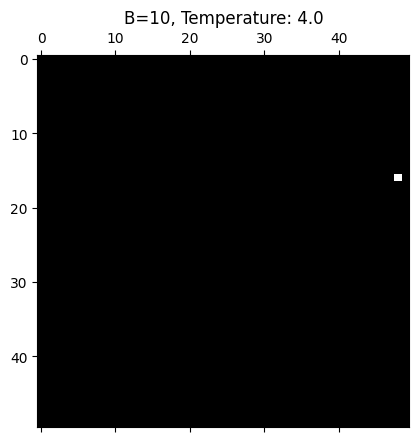

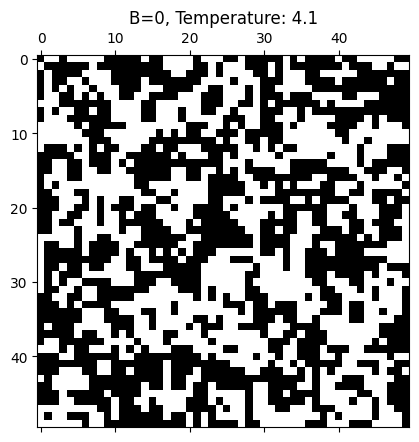

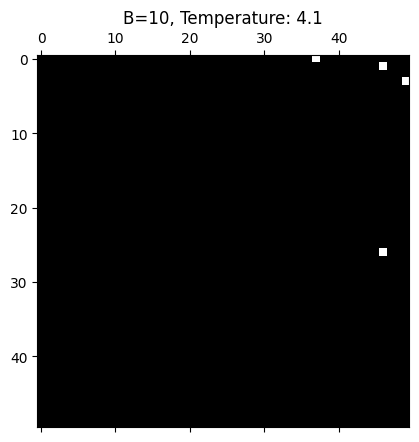

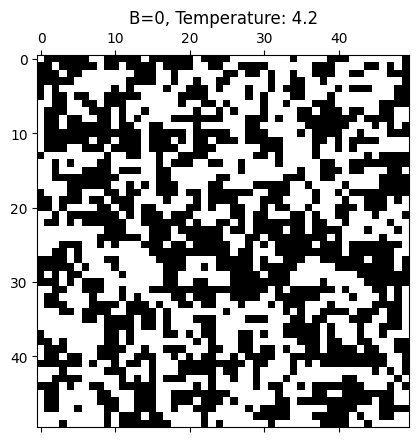

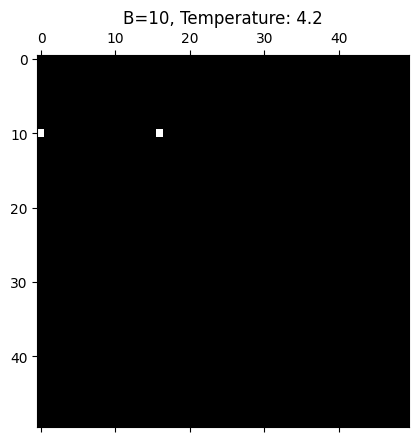

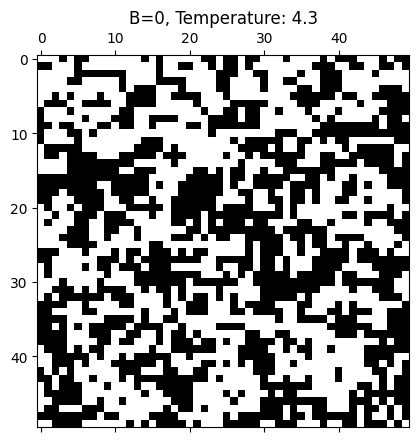

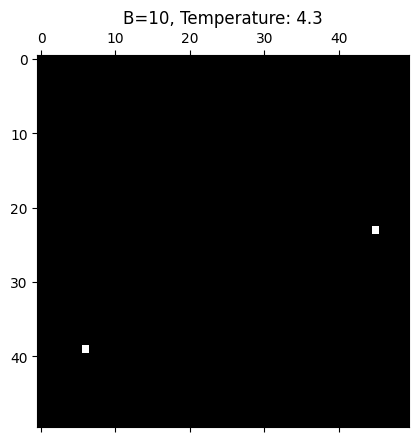

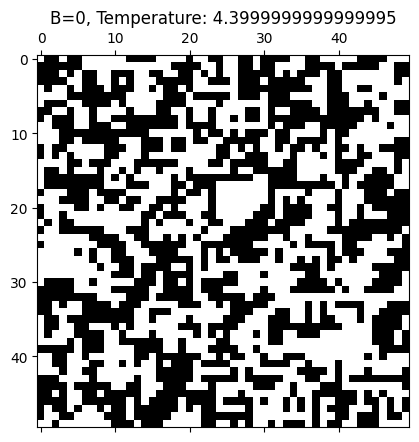

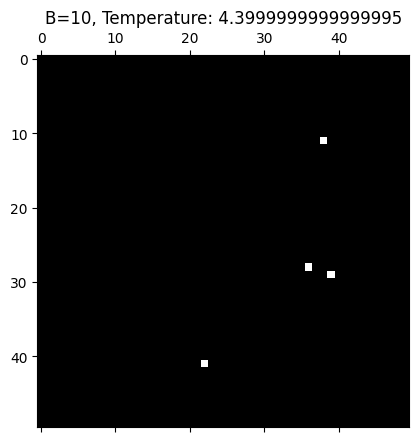

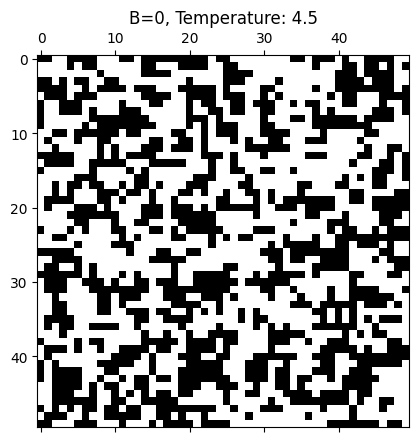

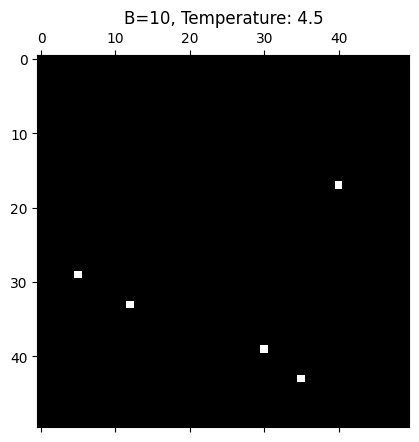

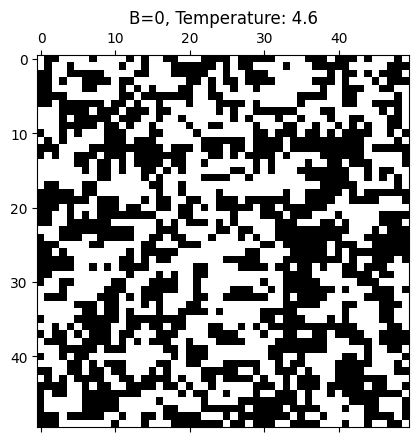

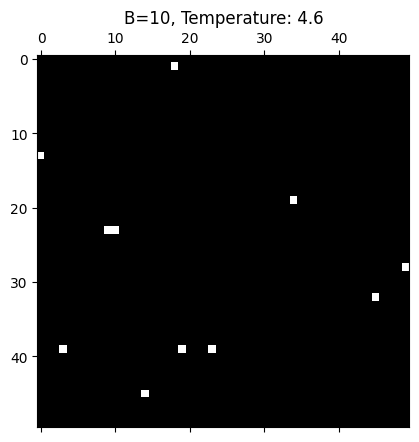

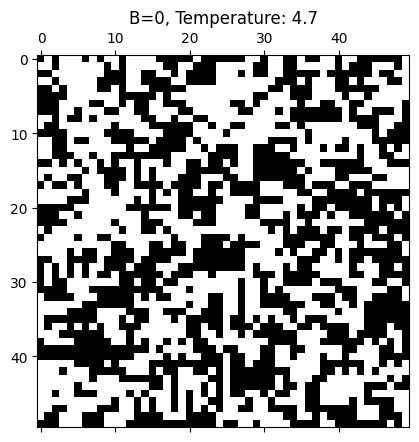

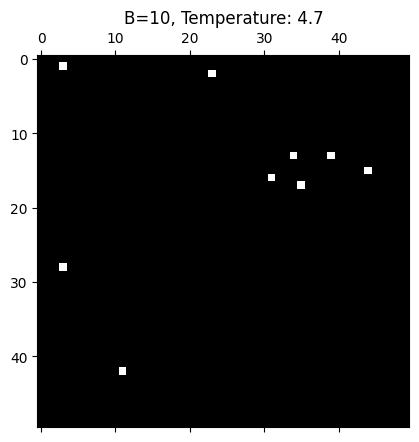

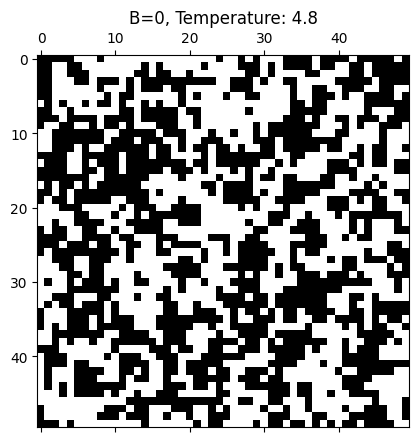

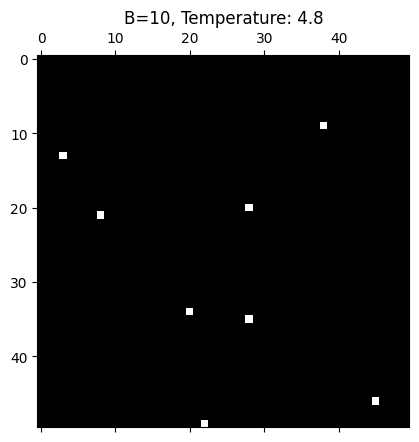

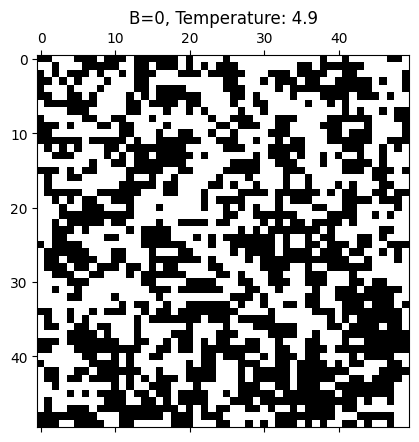

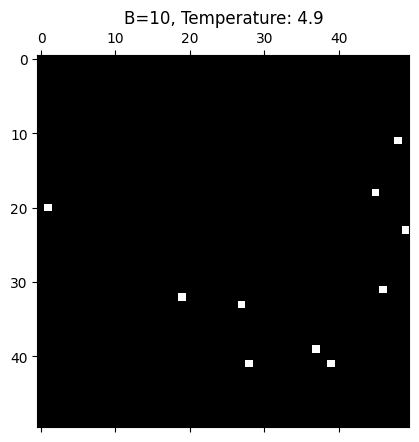

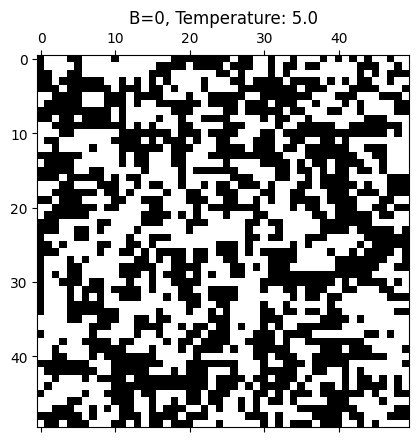

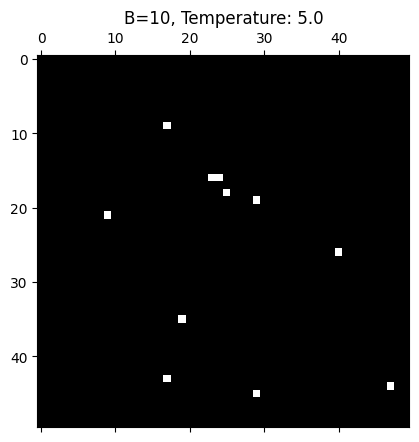

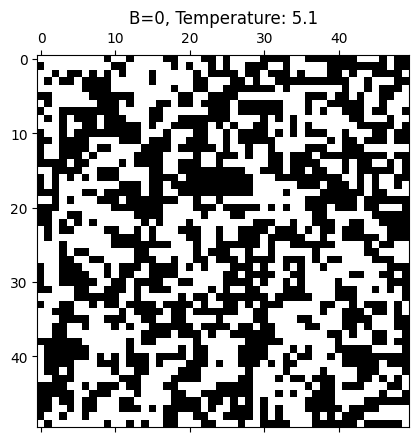

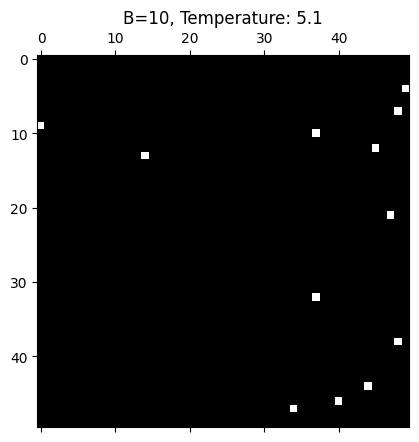

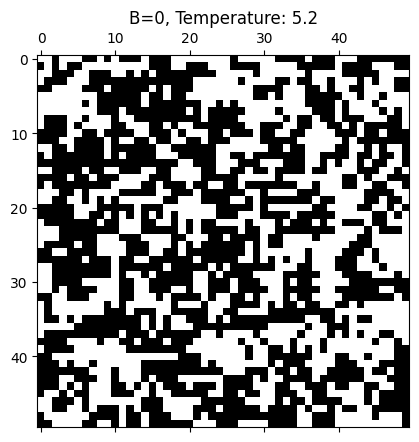

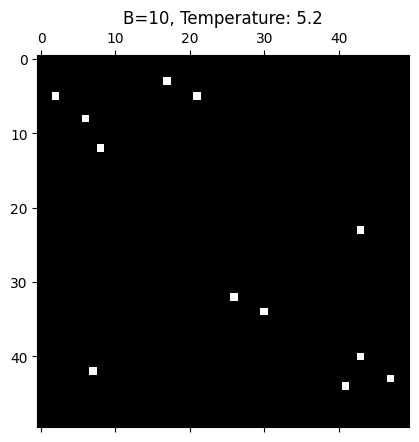

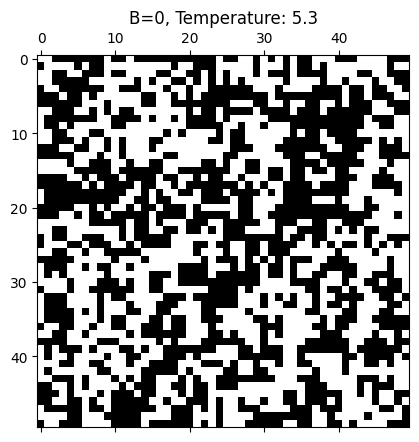

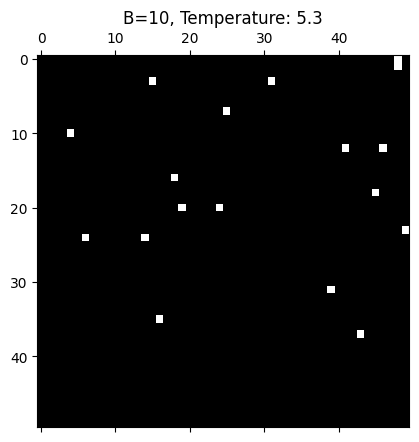

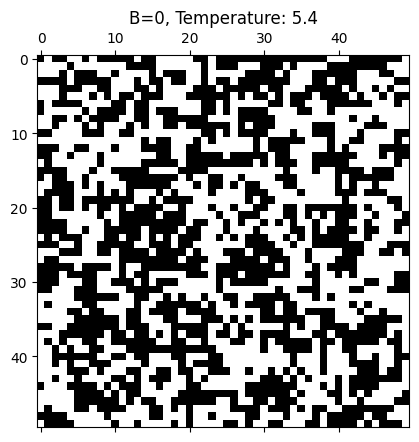

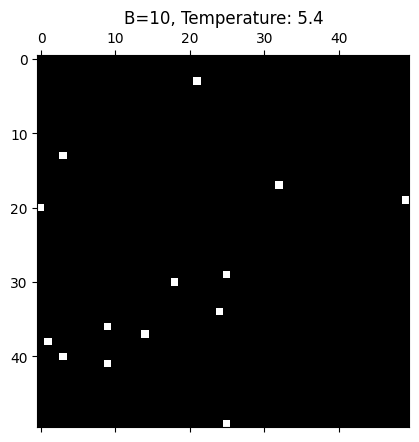

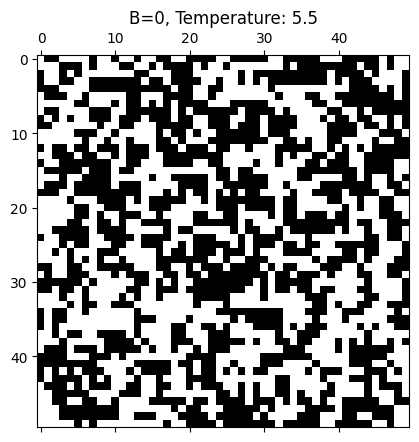

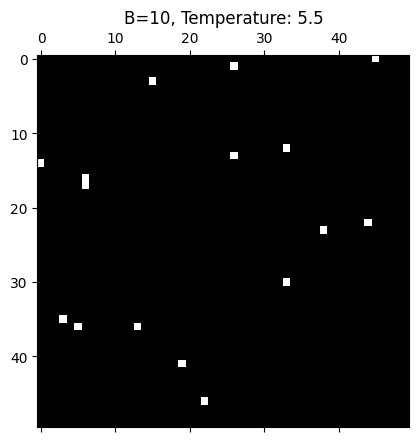

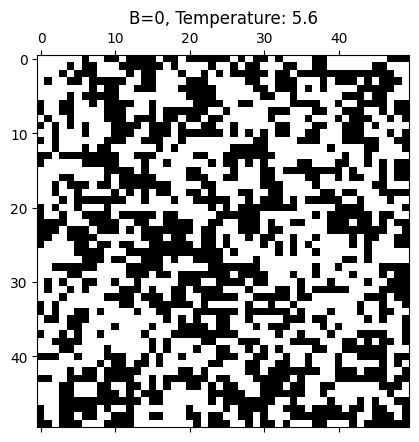

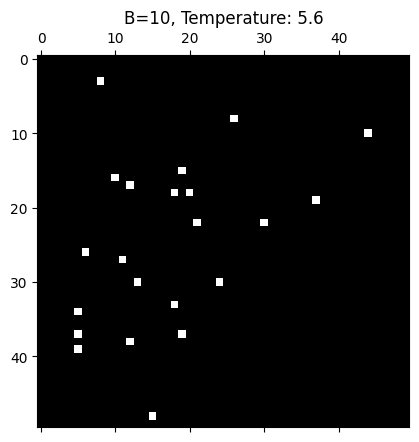

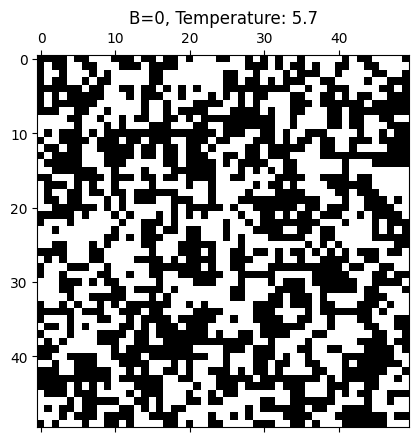

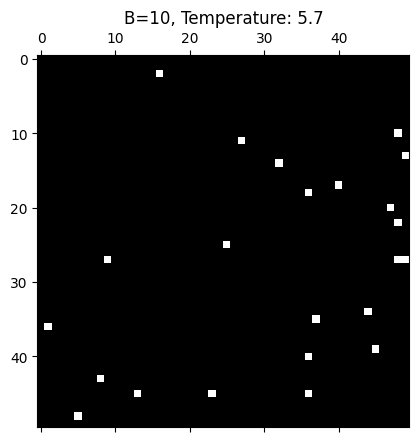

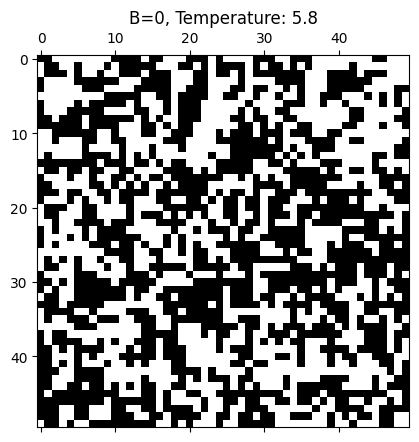

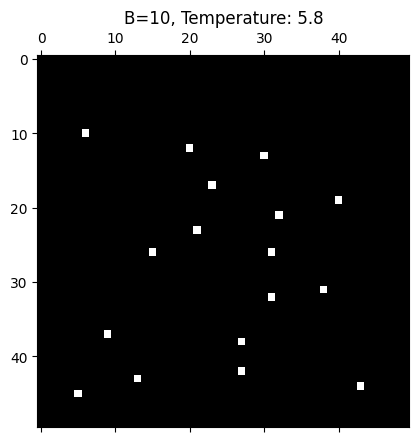

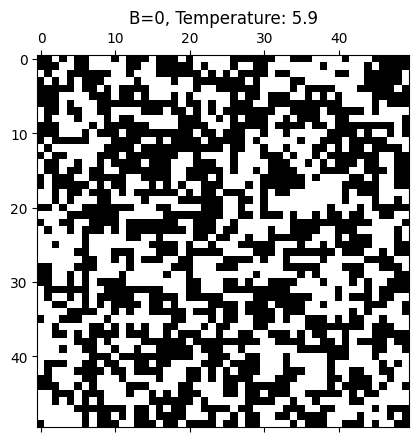

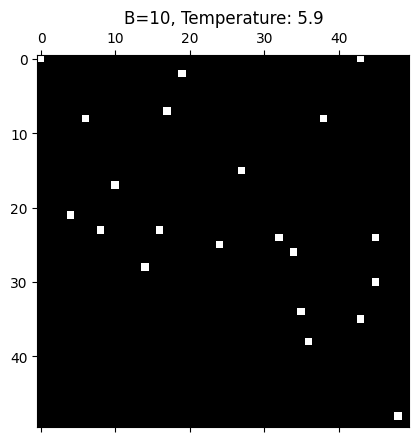

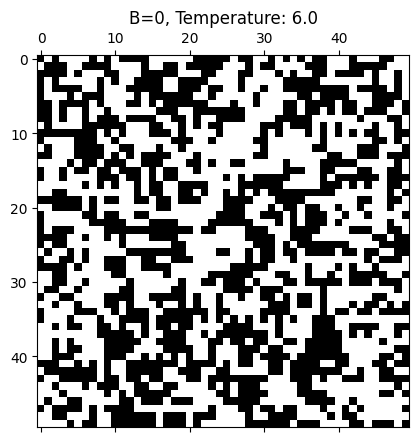

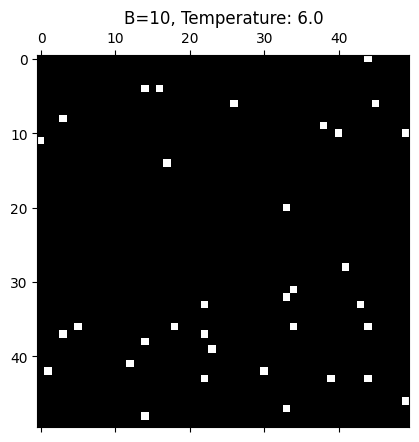

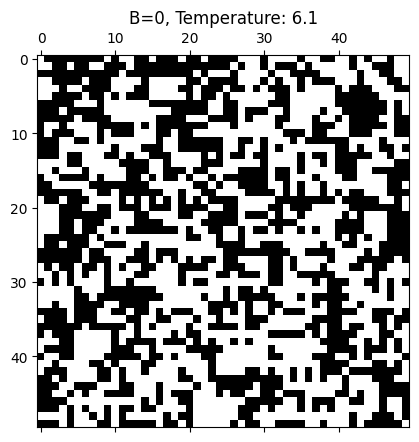

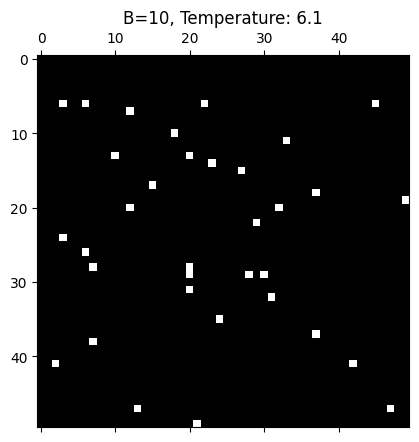

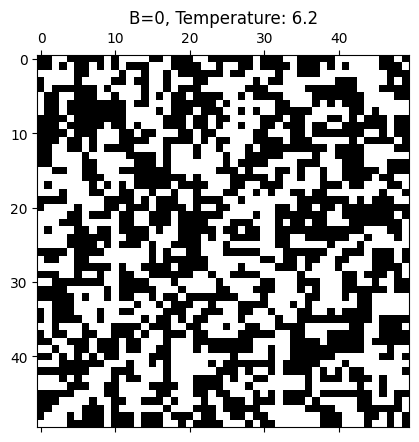

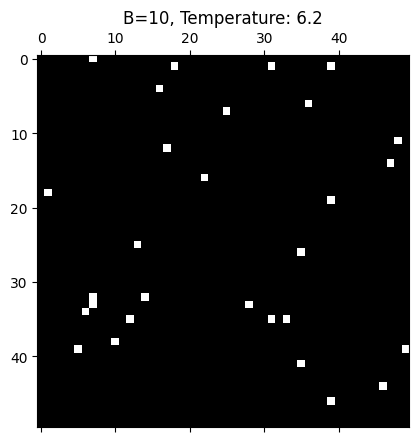

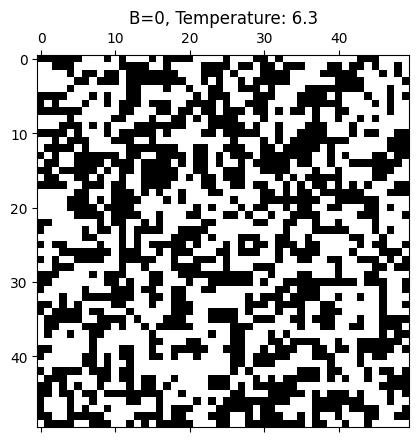

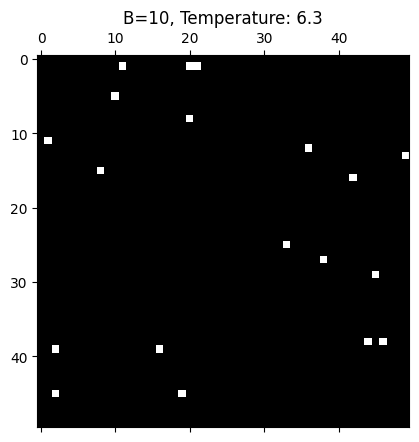

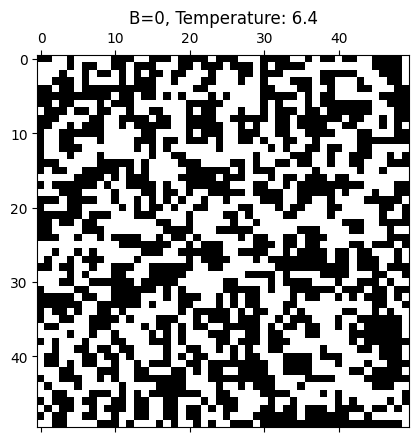

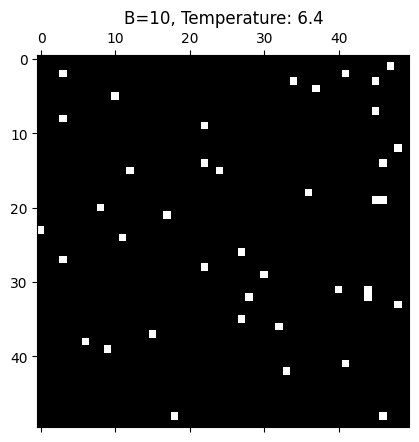

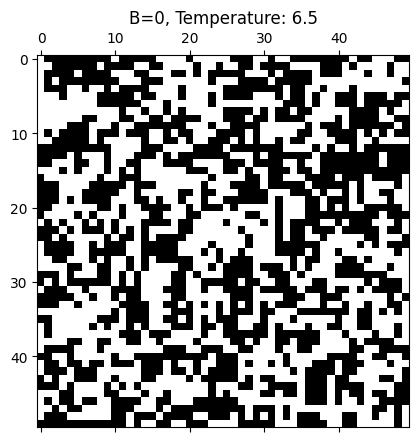

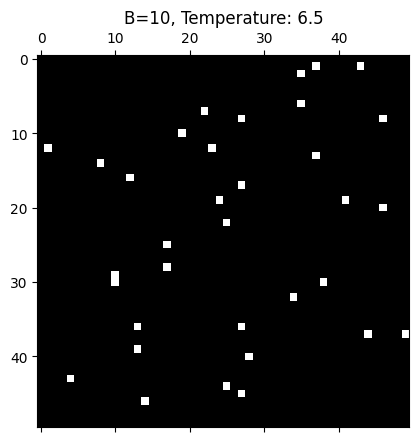

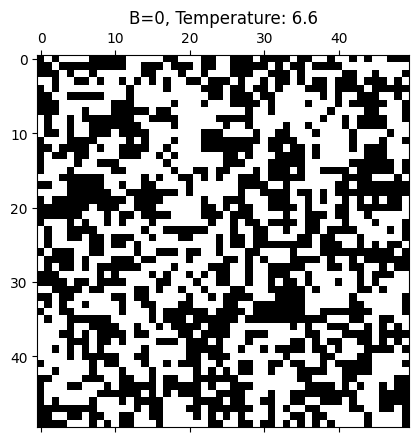

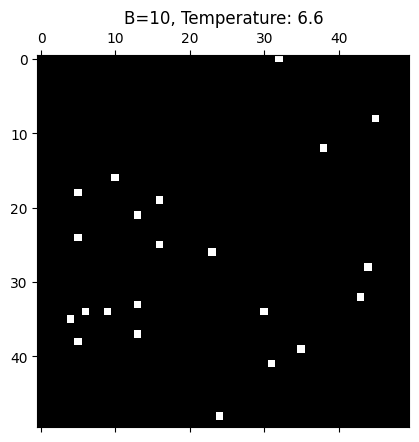

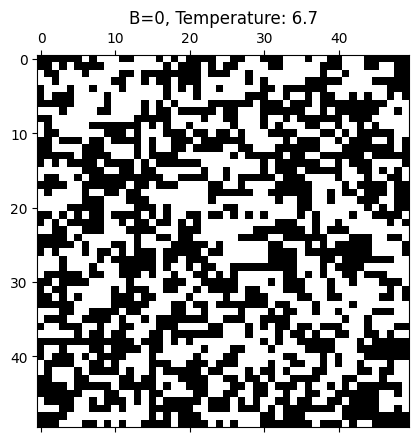

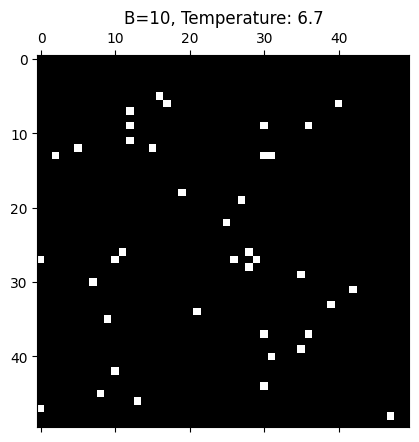

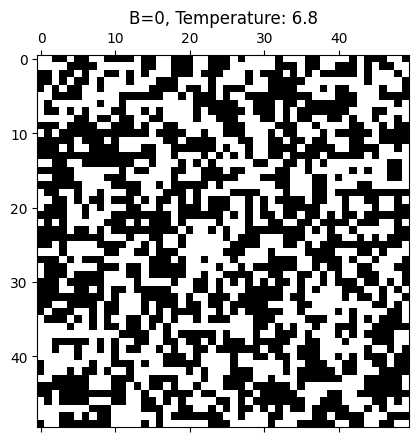

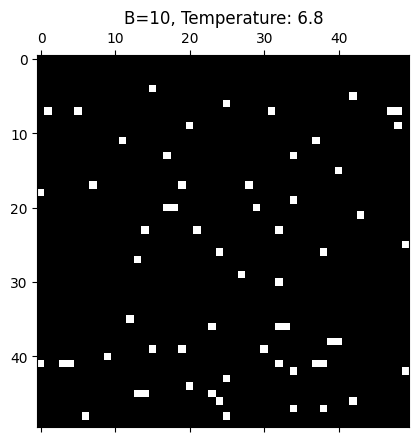

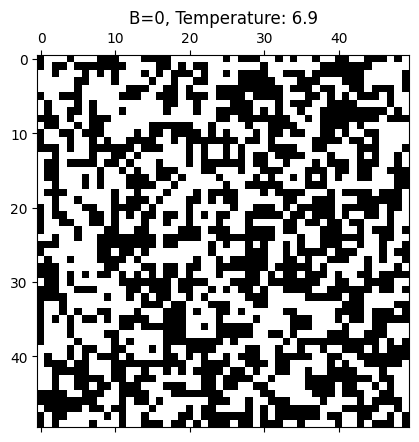

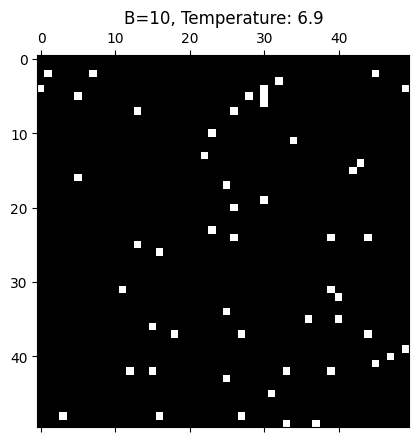

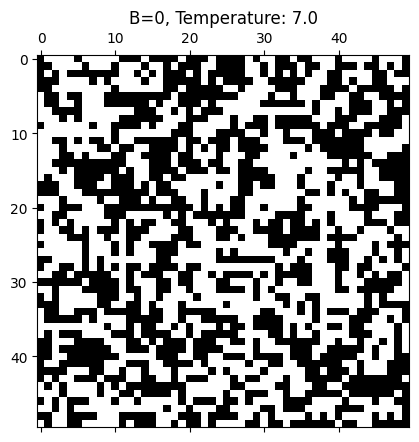

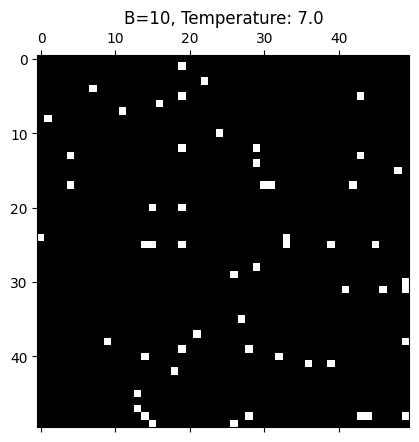

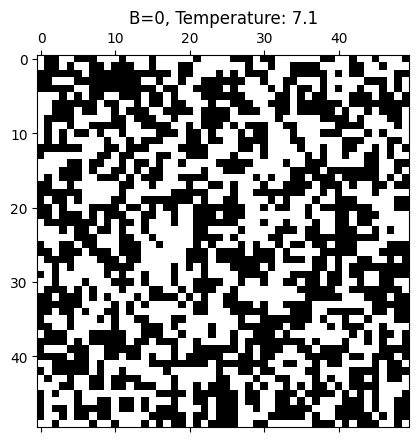

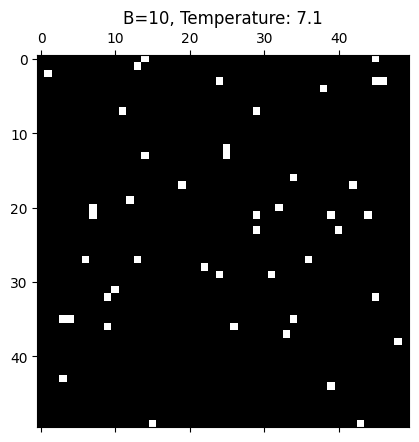

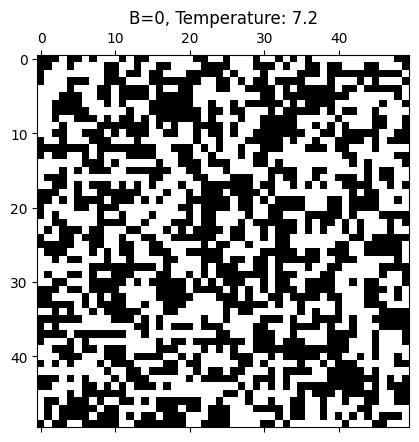

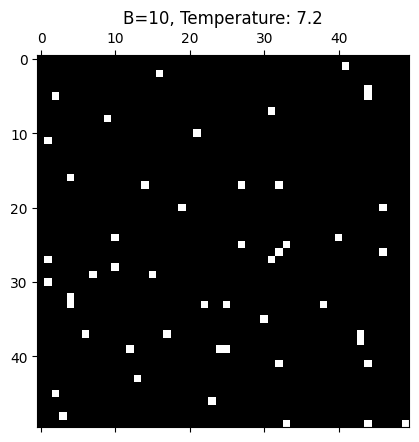

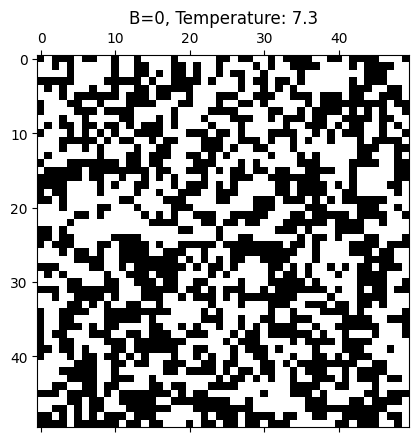

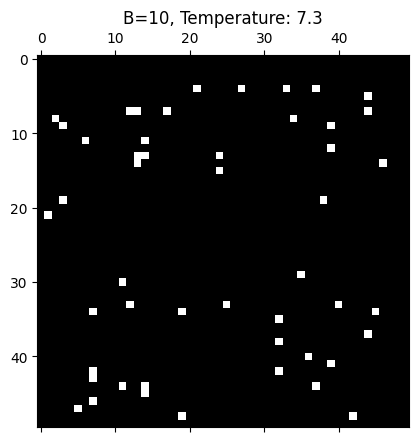

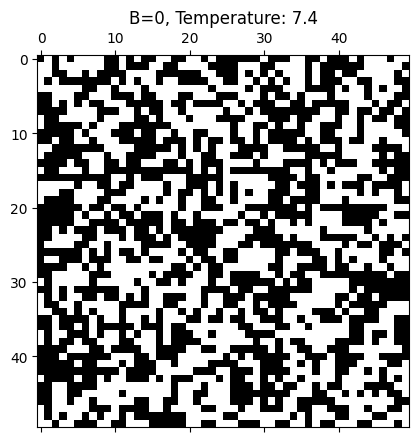

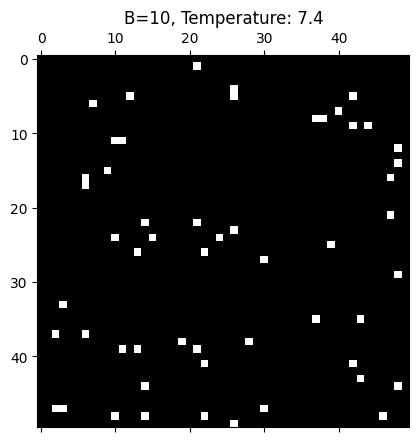

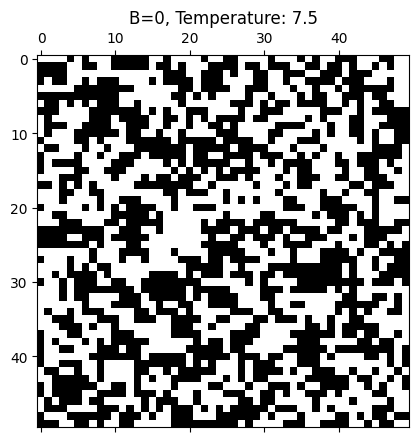

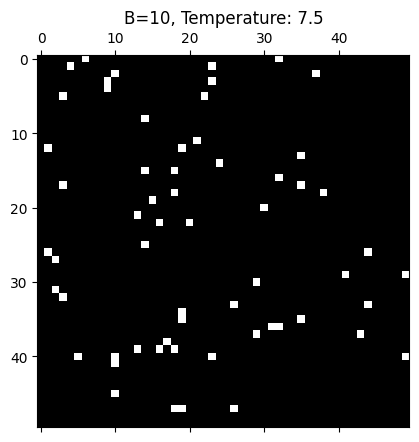

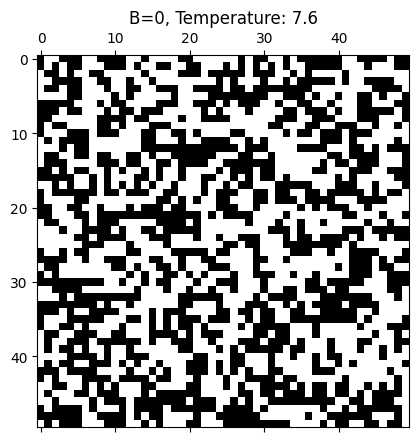

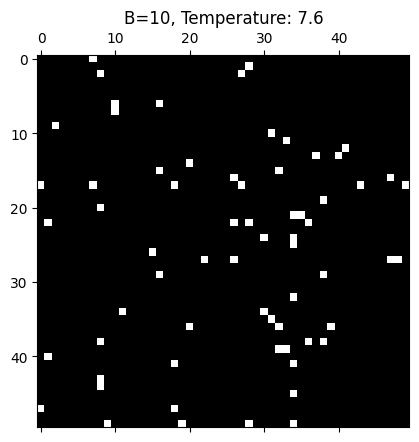

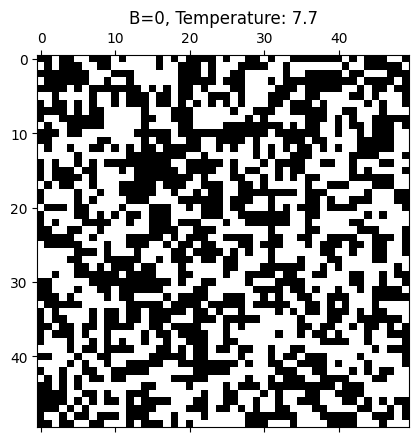

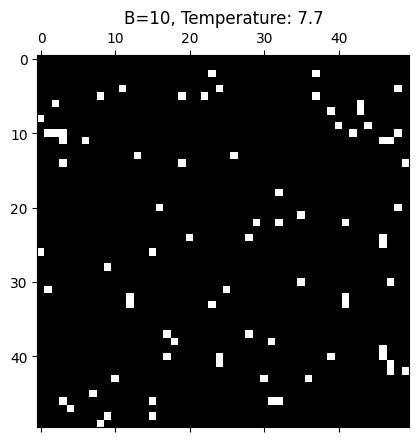

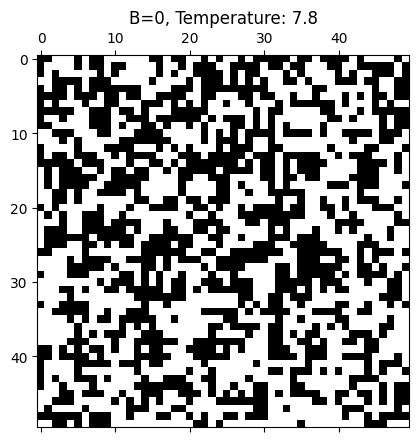

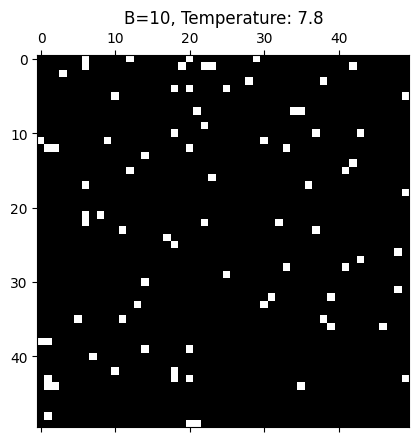

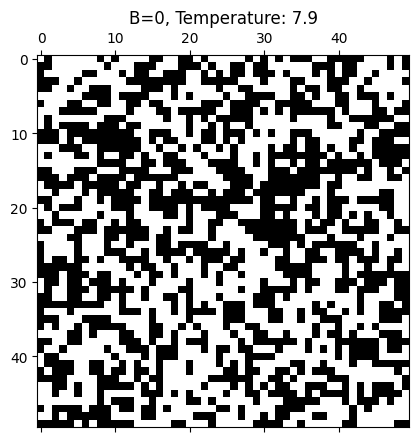

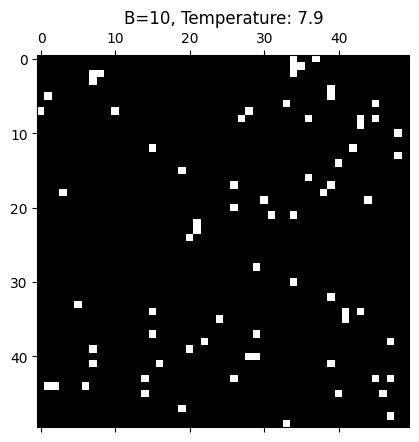

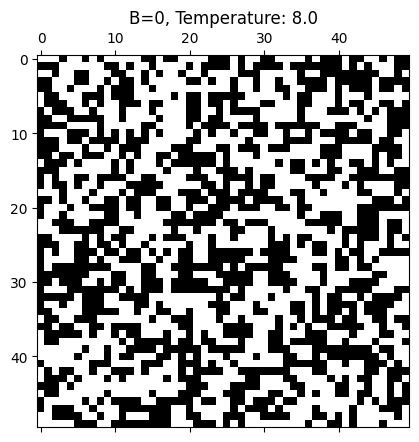

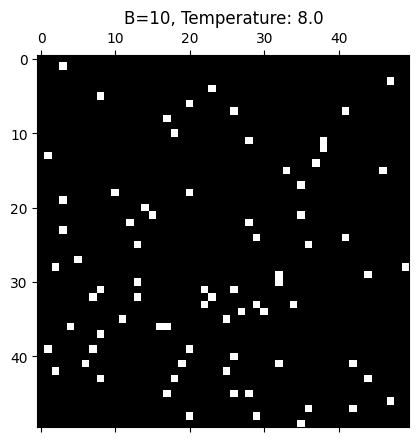

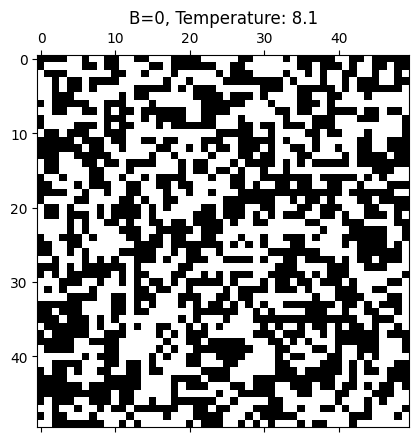

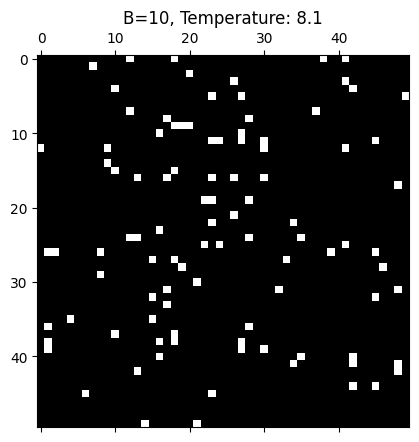

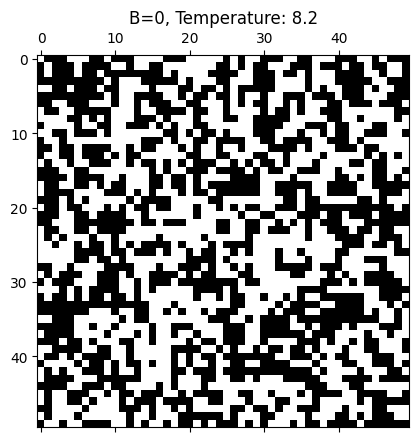

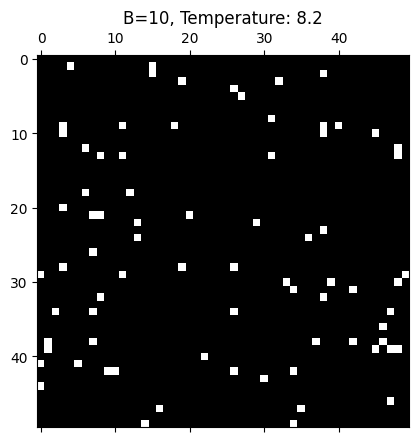

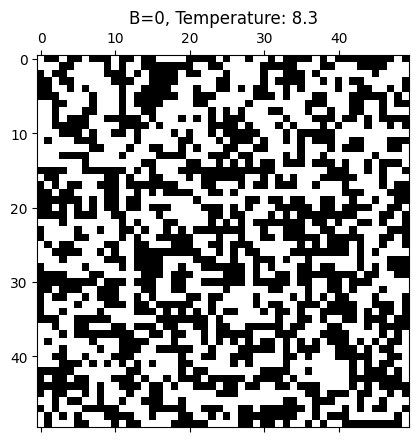

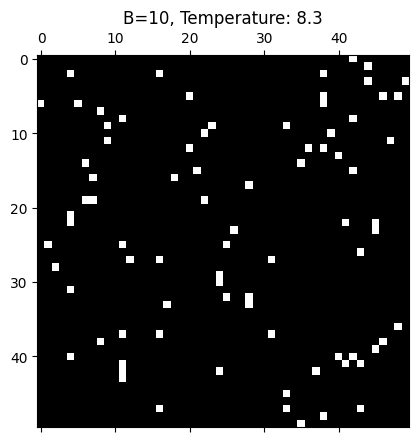

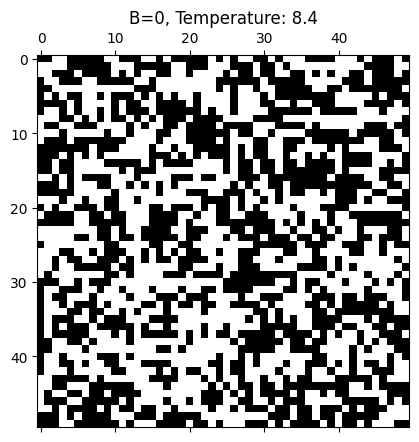

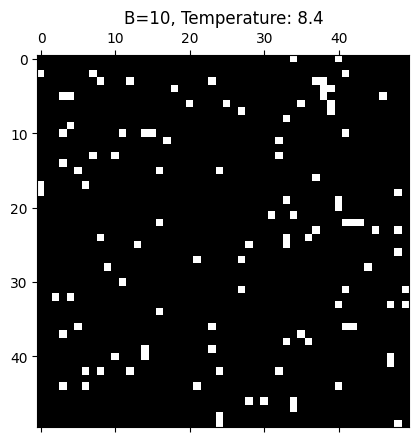

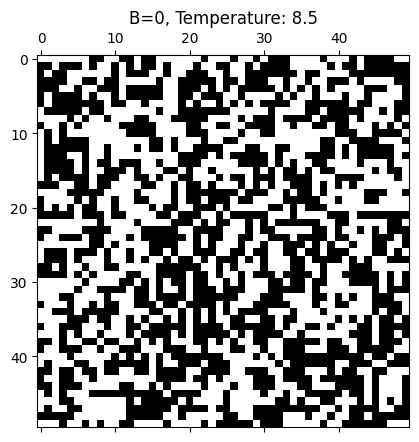

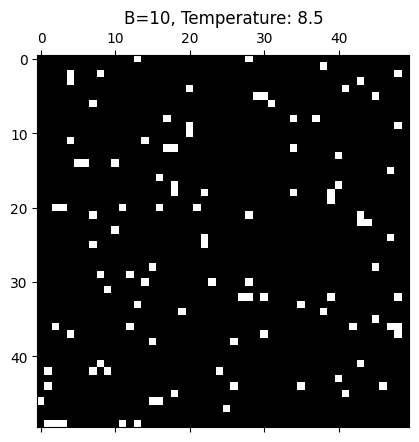

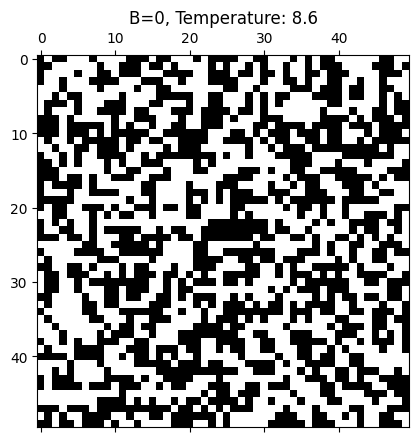

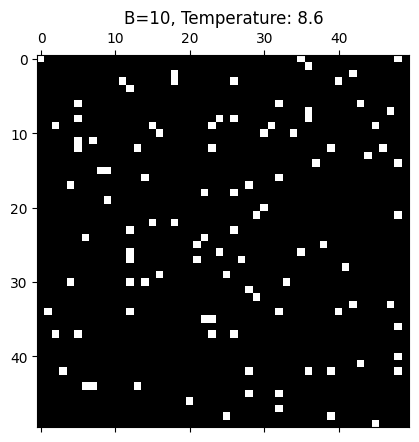

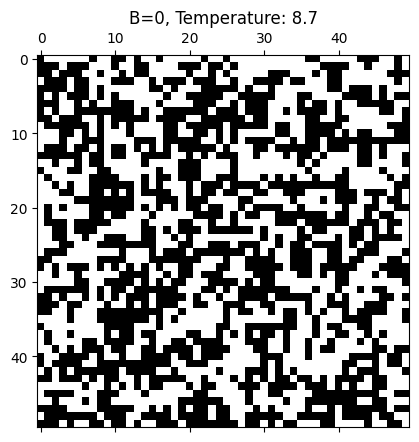

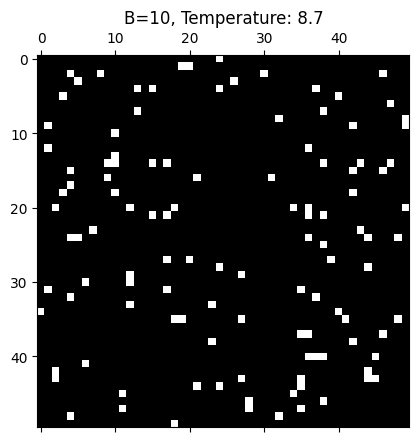

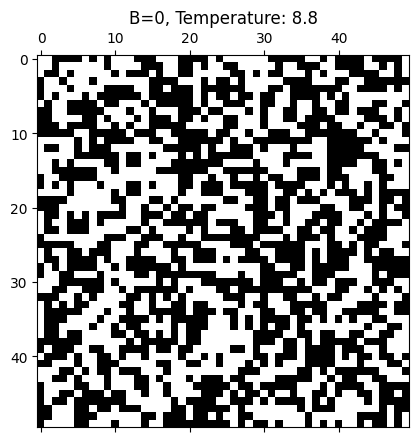

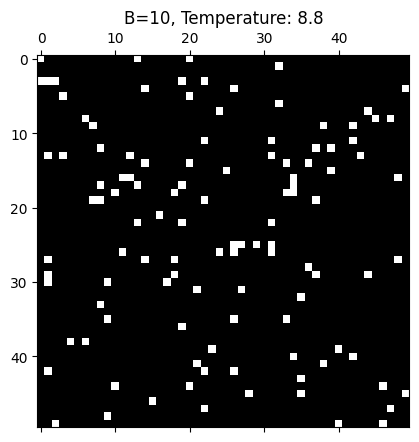

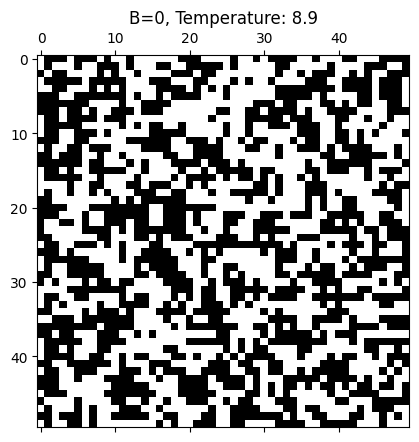

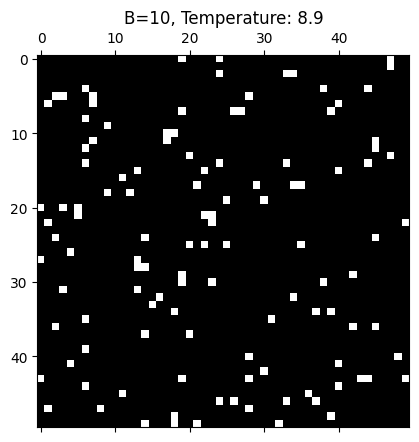

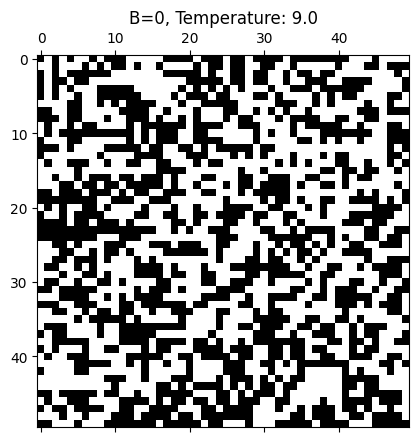

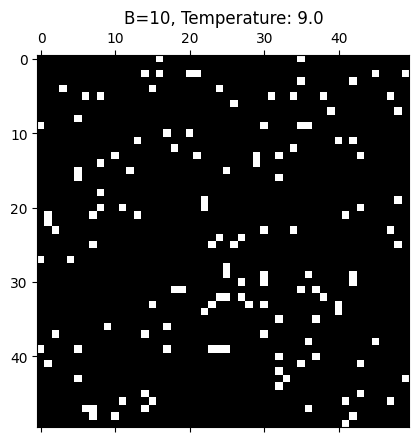

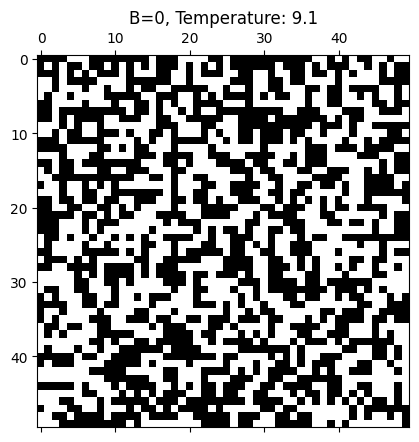

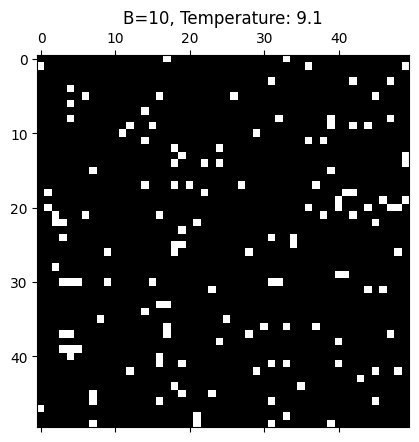

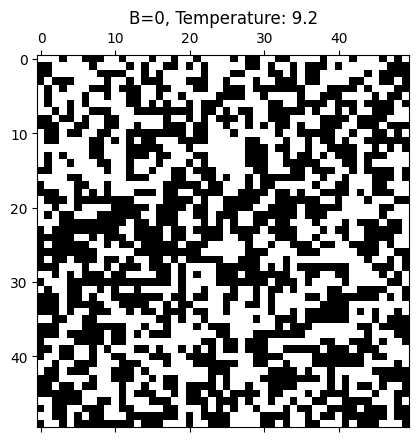

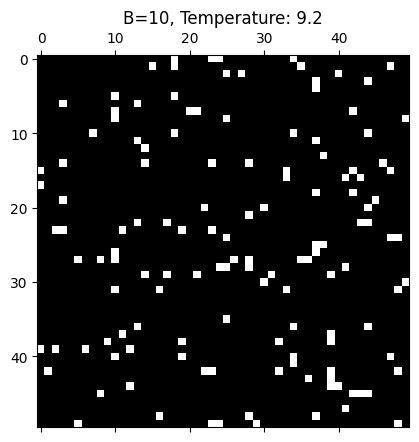

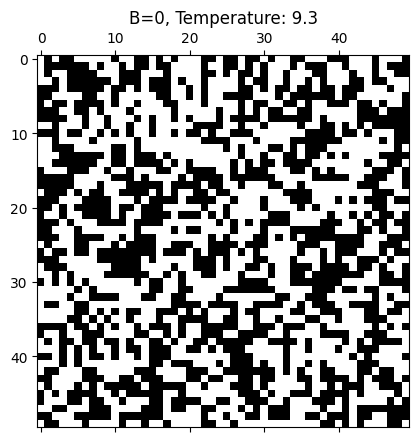

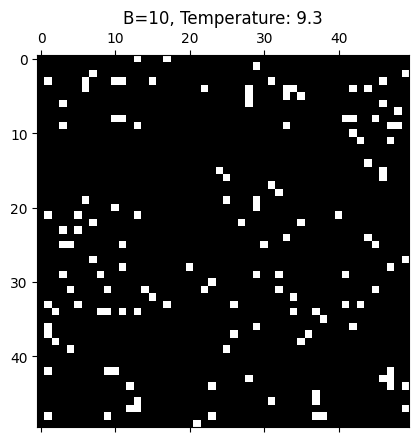

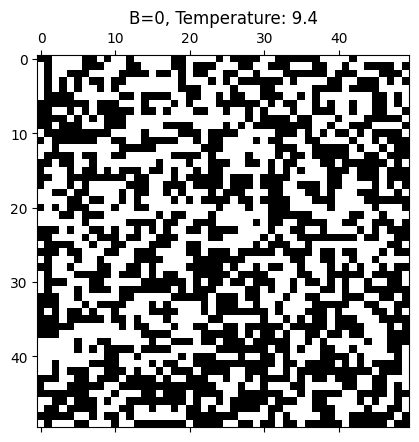

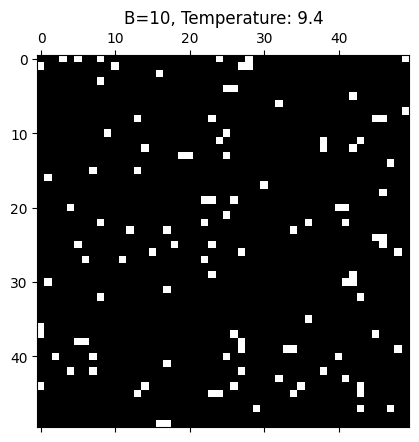

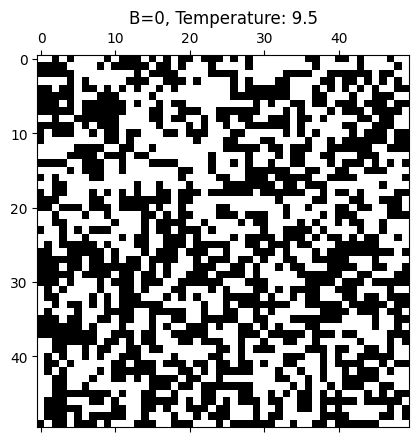

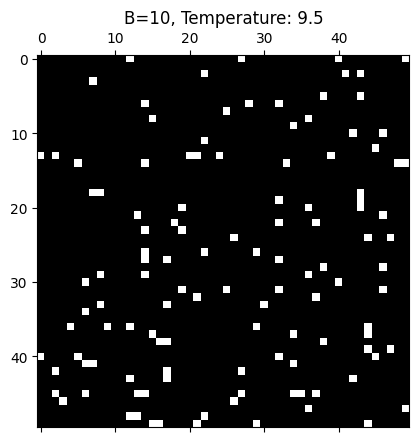

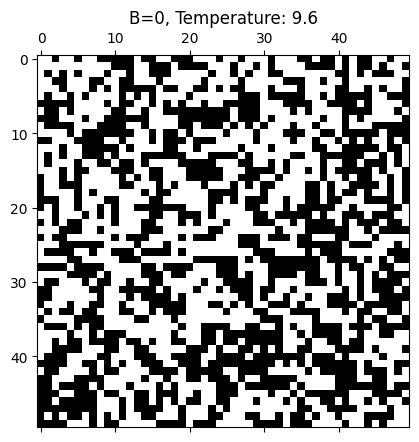

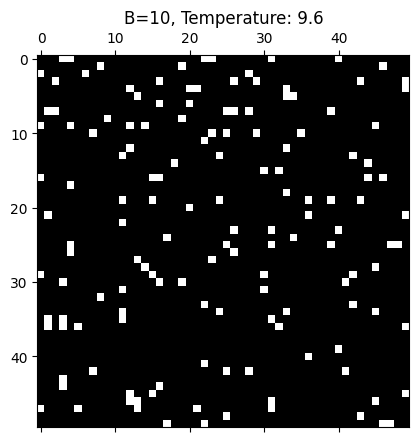

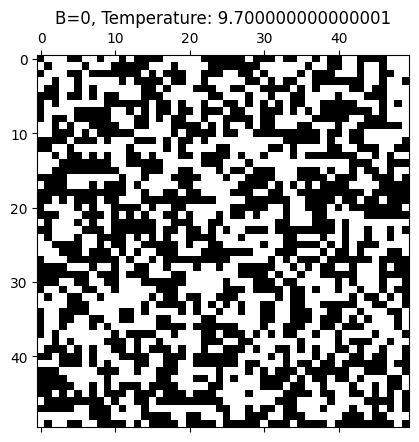

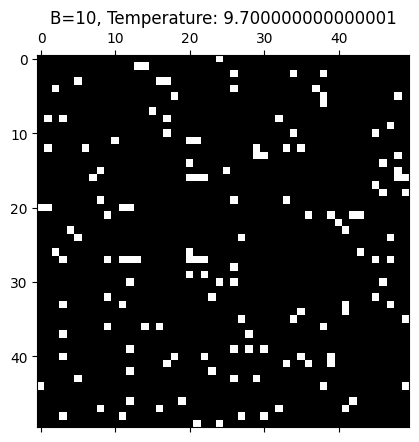

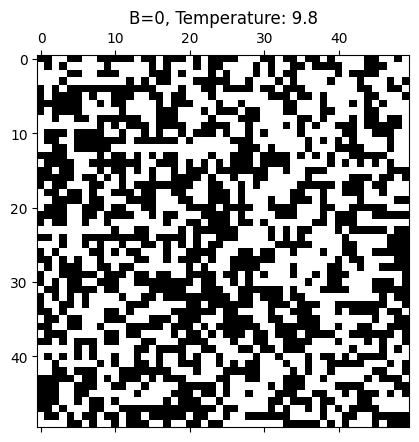

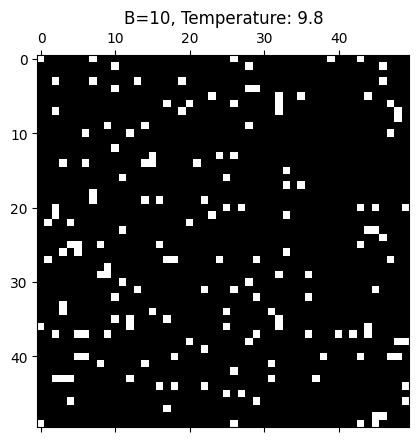

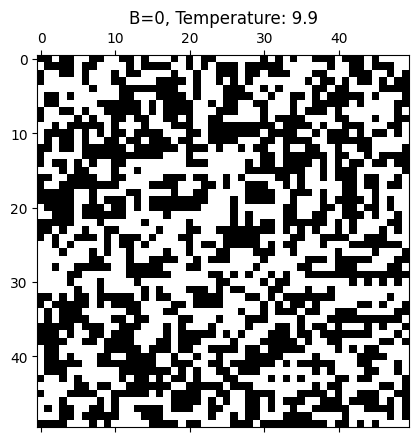

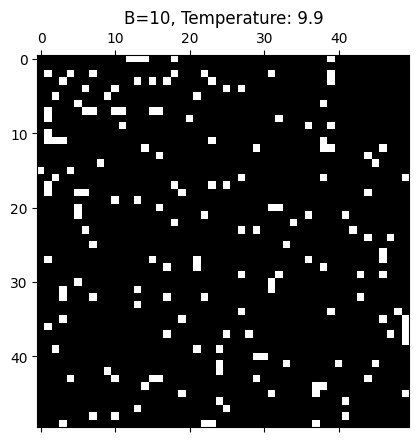

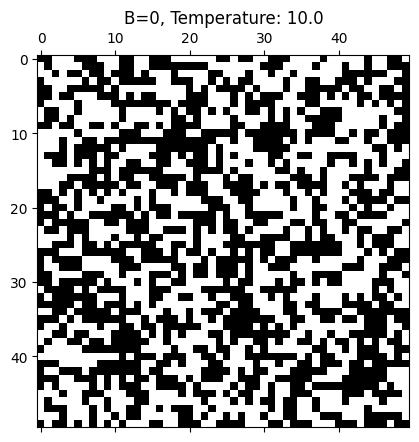

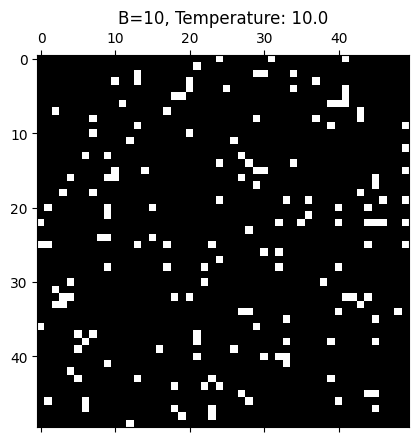

In [85]:
# generate grid
length_grid = 50
grid_array = generate_grid(length_grid)
grid_array_B = generate_grid(length_grid)

# make measurements af different temperatures for U
temperature_list = np.linspace(0.1,10,100)
internal_energy_list_temp = []
magnetization_list_temp = []
heat_capacity_list_temp = []
susceptibility_list_temp = []
internal_energy_list_temp_B = []
magnetization_list_temp_B = []
susceptibility_list_temp_B = []
heat_capacity_list_temp_B = []

steps_equilibrium = 50000 # before: 500000
fluctuation_steps = 100

for temp in temperature_list:
   # grid_array = generate_grid(length_grid)
    #generate grid with 75/25 ratio
    # arrays for quantities in one-temperature fluctuation measurements
    magT=[]
    inenT=[]
    magT_B=[]
    inenT_B=[]
    
    for i in range(steps_equilibrium):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp, a = 0)
        inenT.append(U(grid_array,a=0))
        magT.append(M(grid_array))
    
    for i in range(fluctuation_steps):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp, a = 0)
        inenT.append(U(grid_array,a=0))
        magT.append(M(grid_array))
        

    internal_energy_list_temp.append(U(grid_array,a=0))
    magnetization_list_temp.append(M(grid_array))
    heat_capacity_list_temp.append(heat_capacity(inenT,temp,steps_equilibrium))   
    susceptibility_list_temp.append(susceptibility(magT,temp,length_grid,steps_equilibrium)) 

    
    plt.matshow(grid_array,cmap='gray')
    plt.title('B=0, Temperature: '+str(temp))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp.png')

    for i in range(steps_equilibrium):
        grid_array_B,count_B = Hamiltonian_Monte_carlo(grid = grid_array_B,temperature = temp, a = 10)
    
    for i in range(fluctuation_steps):
        grid_array_B,count_B = Hamiltonian_Monte_carlo(grid = grid_array_B,temperature = temp, a = 10)
        inenT_B.append(U(grid_array_B,a=10))
        magT_B.append(M(grid_array_B))

    internal_energy_list_temp_B.append(U(grid_array_B,a=10))
    magnetization_list_temp_B.append(M(grid_array_B))
    heat_capacity_list_temp_B.append(heat_capacity(inenT_B,temp,steps_equilibrium))  
    susceptibility_list_temp_B.append(susceptibility(magT_B,temp,length_grid,steps_equilibrium)) 

    plt.matshow(grid_array_B,cmap='gray')
    plt.title('B=10, Temperature: '+str(temp))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp B.png')
    

In [86]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

# image array for B=0
image_array = []

for temp in temperature_list:
    image_array.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp.png'))

# image array for B=10
image_array_B = []

for temp in temperature_list:
    image_array_B.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp B.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


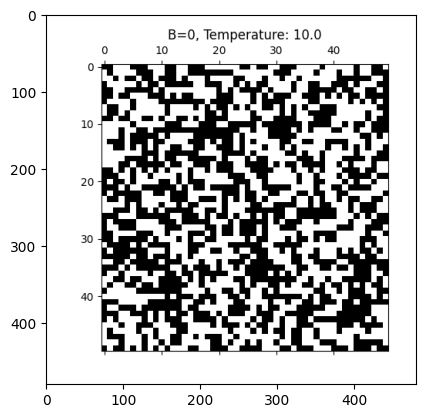

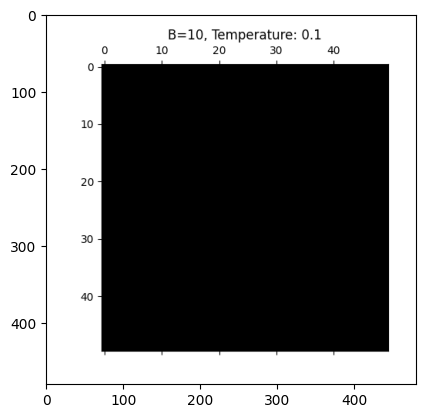

In [87]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF T (B=0).gif')

fig,ax = plt.subplots()
im = ax.imshow(image_array_B[0])

def update(i):
    im.set_array(image_array_B[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array_B),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF T (B=10).gif')

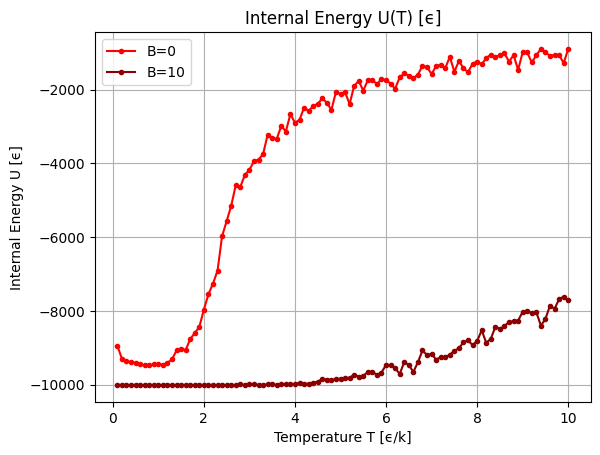

In [88]:
# Internal energy
plt.plot(temperature_list,internal_energy_list_temp, "-",marker='.',color='red',label='B=0')
plt.plot(temperature_list,internal_energy_list_temp_B, "-",marker='.',color='darkred',label='B=10')
plt.xlabel('Temperature T [ϵ/k]')
plt.ylabel('Internal Energy U [ϵ]')
plt.title('Internal Energy U(T) [ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Internal energy (T).png')

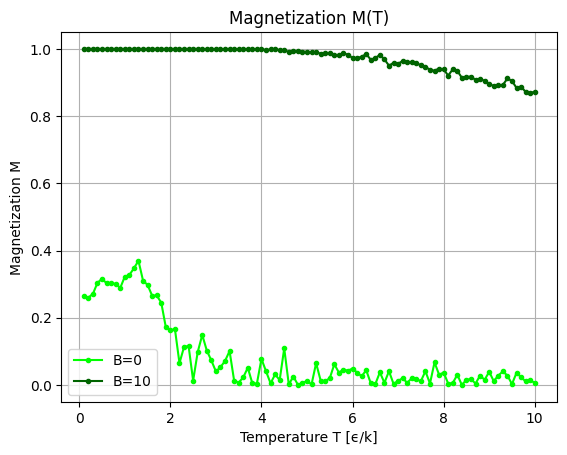

In [89]:
#plot absolute value
plt.plot(temperature_list,np.absolute(magnetization_list_temp), "-",marker='.', color='lime',label='B=0')
plt.plot(temperature_list,np.absolute(magnetization_list_temp_B), "-",marker='.', color='darkgreen',label='B=10')
plt.xlabel('Temperature T [ϵ/k]')
plt.ylabel('Magnetization M')
plt.title('Magnetization M(T)')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Magnetization (T).png')

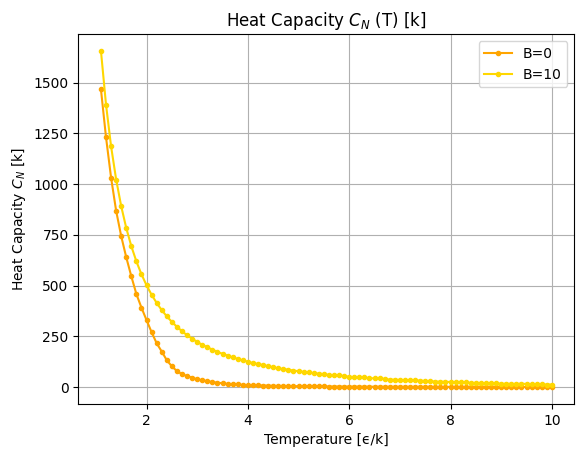

In [90]:
plt.plot(temperature_list[10:],heat_capacity_list_temp[10:], "-", marker='.',color='orange',label='B=0')
plt.plot(temperature_list[10:],heat_capacity_list_temp_B[10:], "-", marker='.',color='gold',label='B=10')
plt.xlabel('Temperature [ϵ/k]')
plt.ylabel('Heat Capacity $C_N$ [k]')
plt.title('Heat Capacity $C_N$ (T) [k]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Heat capacity (T).png')

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/2723493525.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_25580/2723493525.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Susceptibility $\chi$ (T) [1/ϵ]')


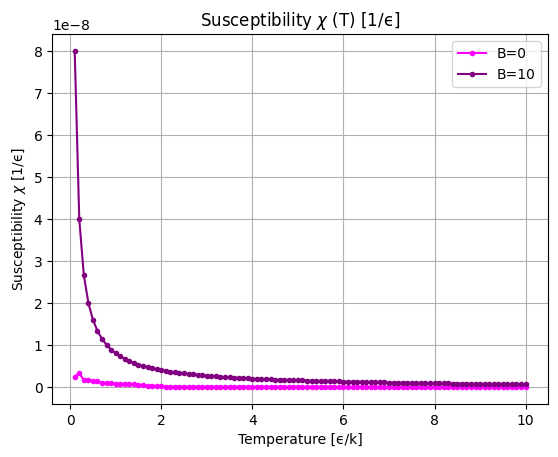

In [91]:

plt.plot(temperature_list,susceptibility_list_temp, "-", marker='.',color='magenta',label='B=0')
plt.plot(temperature_list,susceptibility_list_temp_B, "-", marker='.',color='purple',label='B=10')
plt.xlabel('Temperature [ϵ/k]')
plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
plt.title('Susceptibility $\chi$ (T) [1/ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Susceptibility (T).png')

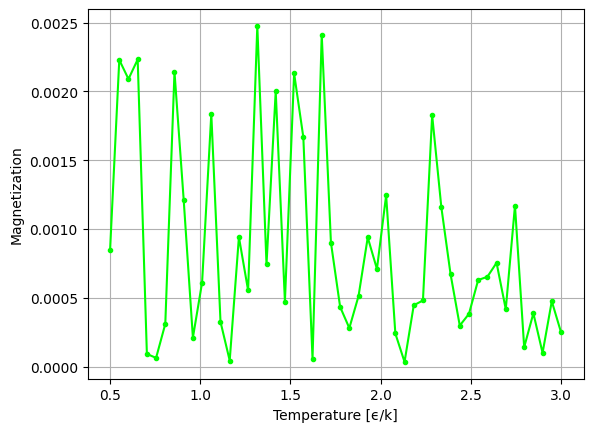

In [92]:
def measure_magnetization(N, temperatures, steps=1000, equilibration_steps=10000):
    magnetizations = []
    for T in temperatures:
        grid = generate_grid(N)
        
        # Equilibrate
        for _ in range(equilibration_steps):
            grid, _ = Hamiltonian_Monte_carlo(grid, T)
        
        # Measure magnetization
        M_values = []
        for _ in range(steps):
            grid, _ = Hamiltonian_Monte_carlo(grid, T)
            M_values.append(np.abs(M(grid)))
        
        # Average magnetization over steps
        magnetizations.append(np.mean(M_values) / (N * N))
    return magnetizations

# Example usage
temperatures = np.linspace(0.5, 3, 50)
magnetizations = measure_magnetization(N=20, temperatures=temperatures)
plt.plot(temperatures, magnetizations,'-',marker='.',color='lime')
plt.xlabel('Temperature [ϵ/k]')
plt.ylabel('Magnetization')
plt.grid()
plt.show()


### Lattice size

In [93]:
# make measurements af different temperatures for U
temperature_list = np.linspace(0.1,10,100)
internal_energy_list_temp = []
magnetization_list_temp = []
heat_capacity_list_temp = []
susceptibility_list_temp = []
internal_energy_list_temp_2 = []
magnetization_list_temp_2 = []
susceptibility_list_temp_2 = []
heat_capacity_list_temp_2 = []

steps_equibrilium = 15000000 # before: 500000

for temp in temperature_list:
   # grid_array = generate_grid(length_grid)
    #generate grid with 75/25 ratio
    
    length_grid_1=50
    length_grid_2=100
    grid_array_1=generate_grid(length_grid_1)
    grid_array_2=generate_grid(length_grid_2)
    for i in range(steps_equibrilium):
        grid_array_1,count_1 = Hamiltonian_Monte_carlo(grid = grid_array_1,temperature = temp, a=0)
        

    internal_energy_list_temp.append(U(grid_array_1,a=0))
    magnetization_list_temp.append(M(grid_array_1))
    heat_capacity_list_temp.append(heat_capacity(internal_energy_list_temp,temp))   
    susceptibility_list_temp.append(susceptibility(magnetization_list_temp,temp,length_grid_1)) 

    
    plt.matshow(grid_array,cmap='gray')
    plt.title('N=50, Temperature: '+str(temp))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp 1.png')

    for i in range(steps_equibrilium):
        grid_array_2,count_2 = Hamiltonian_Monte_carlo(grid = grid_array_2,temperature = temp, a=0)
        

    internal_energy_list_temp_2.append(U(grid_array_2,a=0))
    magnetization_list_temp_2.append(M(grid_array_2))
    heat_capacity_list_temp_2.append(heat_capacity(internal_energy_list_temp_2,temp))  
    susceptibility_list_temp_2.append(susceptibility(magnetization_list_temp_2,temp,length_grid_2)) 

    plt.matshow(grid_array_B,cmap='gray')
    plt.title('N=100, Temperature: '+str(temp))
    plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(temp)+'temp 2.png')
    

TypeError: heat_capacity() missing 1 required positional argument: 'count'

In [ ]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

# image array for B=0
image_array = []

for length in length_list:
    length_grid=int(length)
    image_array.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(length_grid)+'length.png'))

# image array for B=10
image_array_B = []

for length in length_list:
    length_grid=int(length)
    image_array_B.append(Image.open('/Users/maxdurr/Documents/Studium/Bergen/TSP/ising_model_'+str(length_grid)+'length B.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


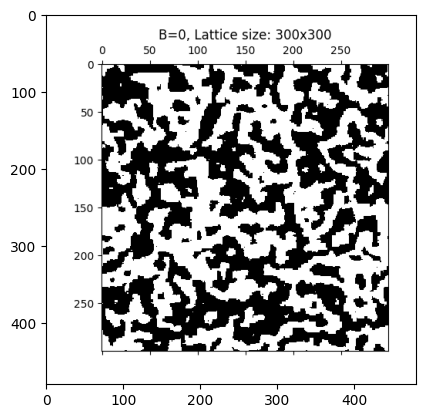

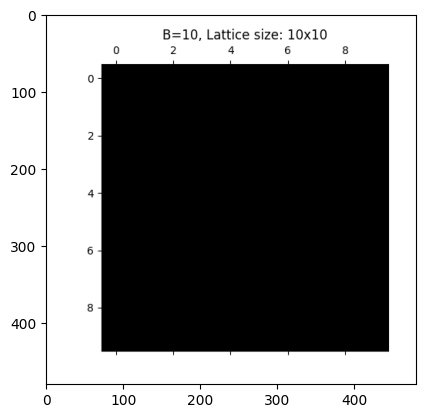

In [ ]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF L (B=0).gif')

fig,ax = plt.subplots()
im = ax.imshow(image_array_B[0])

def update(i):
    im.set_array(image_array_B[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array_B),interval = 250)
ani.save('/Users/maxdurr/Documents/Studium/Bergen/TSP/GIF L (B=10).gif')

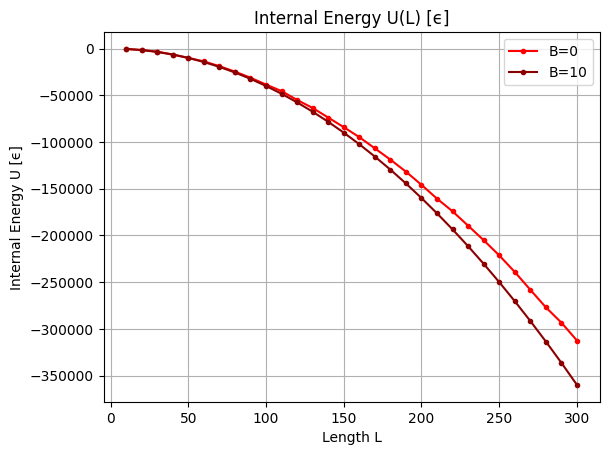

In [ ]:
# Internal energy
plt.plot(length_list,internal_energy_list_length, "-",marker='.',color='red',label='B=0')
plt.plot(length_list,internal_energy_list_length_B, "-",marker='.',color='darkred',label='B=10')
plt.xlabel('Length L')
plt.ylabel('Internal Energy U [ϵ]')
plt.title('Internal Energy U(L) [ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Internal energy (L).png')

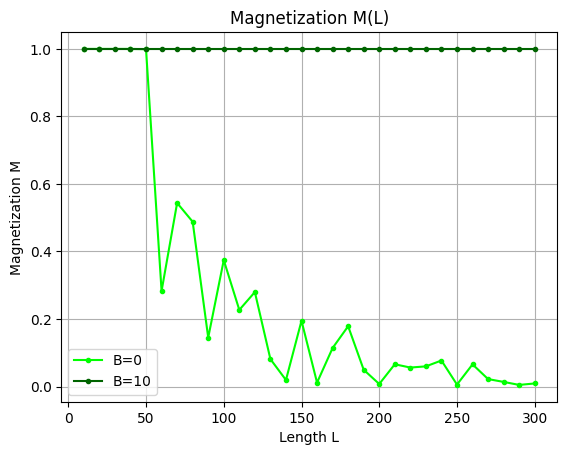

In [ ]:
# destroy one element of an array
def destroy_element(array,i):
    array_new=[]
    for j in range(len(array)):
        if j is not i:
            array_new.append(array[j])
    return np.array(array_new)

plt.plot(destroy_element(length_list,2),np.absolute(destroy_element(magnetization_list_length,2)), "-",marker='.', color='lime',label='B=0')
plt.plot(length_list,np.absolute(magnetization_list_length_B), "-",marker='.', color='darkgreen',label='B=10')
plt.xlabel('Length L')
plt.ylabel('Magnetization M')
plt.title('Magnetization M(L)')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Magnetization (L).png')

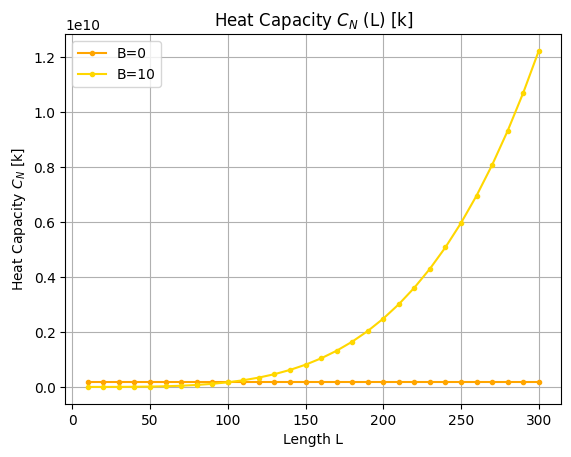

In [ ]:
plt.plot(length_list,heat_capacity_list_length, "-", marker='.',color='orange',label='B=0')
plt.plot(length_list,heat_capacity_list_length_B, "-", marker='.',color='gold',label='B=10')
plt.xlabel('Length L')
plt.ylabel('Heat Capacity $C_N$ [k]')
plt.title('Heat Capacity $C_N$ (L) [k]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Heat capacity (L).png')

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_16356/2853518519.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
/var/folders/b5/0msbvbz97t1d85bqklj1lvhw0000gn/T/ipykernel_16356/2853518519.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Susceptibility $\chi$ (L) [1/ϵ]')


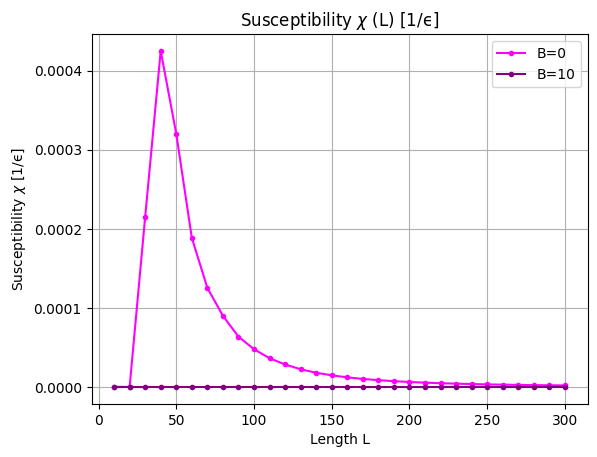

In [ ]:
# Susceptibility
plt.plot(length_list,susceptibility_list_length, "-", marker='.',color='magenta',label='B=0')
plt.plot(length_list,susceptibility_list_length_B, "-", marker='.',color='purple',label='B=10')
plt.xlabel('Length L')
plt.ylabel('Susceptibility $\chi$ [1/ϵ]')
plt.title('Susceptibility $\chi$ (L) [1/ϵ]')
plt.legend()
plt.grid()
plt.savefig('/Users/maxdurr/Documents/Studium/Bergen/TSP/Susceptibility (L).png')